## `CROSS SELL PREDICTION - AV`

### `STEP 1: IMPORT LIBRARIES`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### `STEP 2: IMPORT DATASET`

In [2]:
train_data = pd.read_csv('train.csv')

test_data  = pd.read_csv('test.csv')

print("Data Imported Successfully")

Data Imported Successfully


### `STEP 3: EXPLORTORY DATA ANALYSIS / DATA MINING / DATA CLEANING`

In [3]:
# Checking Shape

train_data.shape

(381109, 12)

In [4]:
#  Checking Top Records

train_data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [5]:
# Cheking Null Values

train_data.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

> > __`VARIABLE IDENTIFICATION`__

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
id                      381109 non-null int64
Gender                  381109 non-null object
Age                     381109 non-null int64
Driving_License         381109 non-null int64
Region_Code             381109 non-null float64
Previously_Insured      381109 non-null int64
Vehicle_Age             381109 non-null object
Vehicle_Damage          381109 non-null object
Annual_Premium          381109 non-null float64
Policy_Sales_Channel    381109 non-null float64
Vintage                 381109 non-null int64
Response                381109 non-null int64
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


Summary:

   - We need to convert our target variable - __`Response`__ into object category.
   
   
   - Also we need to __`Region_Code`__ into integer.

In [7]:
# train_data['Response'] = train_data['Response'].astype('object')

train_data['Region_Code'] = train_data['Region_Code'].astype('int64')
test_data['Region_Code'] = test_data['Region_Code'].astype('int64')

<br>

> > __`UNIVARIANT ANALYSIS`__

#### `RESPONSE`

Nos of Responses
0    334399
1     46710
Name: Response, dtype: int64


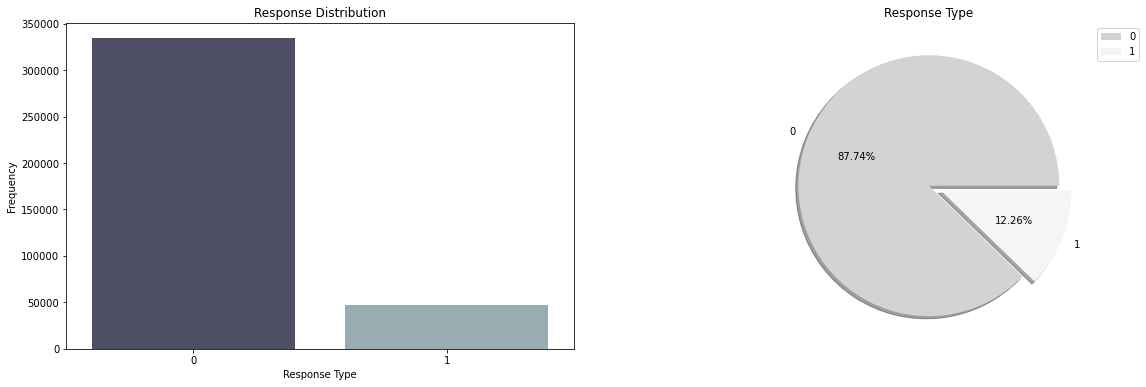

In [8]:
plt.figure(figsize = (20,6))

plt.subplot(1, 2, 1)
print("Nos of Responses")
print(train_data['Response'].value_counts())

sns.countplot(x = train_data['Response'],
              data = train_data,
              palette = 'bone')
plt.title('Response Distribution')
plt.xlabel('Response Type')
plt.ylabel('Frequency')


plt.subplot(1, 2, 2)
labels = ['0', '1']
size = train_data['Response'].value_counts()
colors = ['lightgrey', 'whitesmoke']
explode = [0, 0.1]

plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Response Type')
plt.axis('off')
plt.legend(loc='upper left', bbox_to_anchor = (1,1))

plt.show()

Summary:
    
    1) Overall 87% from the datset tells us that customers where not intrested in Vehicle Insurance
    
    2) We recored very low respose those who favor for Vehicle Insurance.

#### `GENDER`

Nos of Males and Females:
Male      206089
Female    175020
Name: Gender, dtype: int64


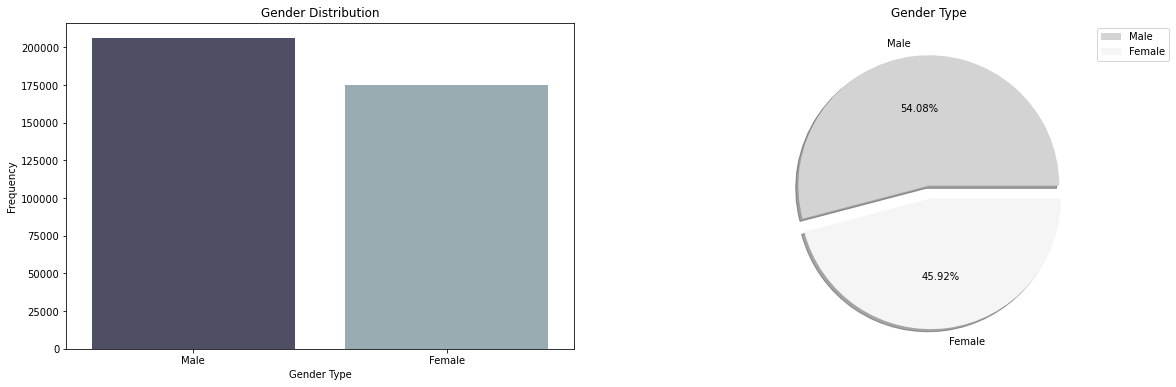

In [9]:
plt.figure(figsize = (20,6))

plt.subplot(1, 2, 1)
print("Nos of Males and Females:")
print(train_data['Gender'].value_counts())

sns.countplot(x = train_data['Gender'],
              data = train_data,
              palette = 'bone')
plt.title('Gender Distribution')
plt.xlabel('Gender Type')
plt.ylabel('Frequency')


plt.subplot(1, 2, 2)
labels = ['Male', 'Female']
size = train_data['Gender'].value_counts()
colors = ['lightgrey', 'whitesmoke']
explode = [0, 0.1]

plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender Type')
plt.axis('off')
plt.legend(loc='upper left', bbox_to_anchor = (1,1))

plt.show()

Summary:
    
     1)  In our dataset 54 % (2 lack) accounted Males and 46 % (1.75 lack) Females.
    
     2)  We can further analyze in bivariant analysis as to which gender accounted more for vehicle assurance.

#### `GENERATION`

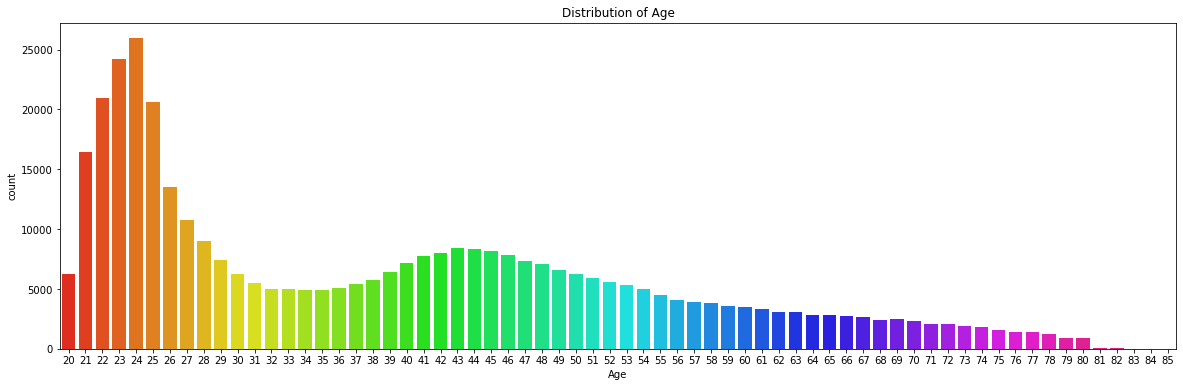

In [10]:
plt.figure(figsize = (20,6))

sns.countplot(train_data['Age'], palette = 'hsv')
plt.title('Distribution of Age')
plt.show()

Summary :
    
    1) Age Distribution looked to be right skewed. 
    
    2) Min range of age was 20 and Maximum was 85.
    
    3) Most of the generation are between 20-30 years of age and we see a rising fall after the age of 45. 

#### `DRIVING LICENSE`

Driving License - Yes/No
1    380297
0       812
Name: Driving_License, dtype: int64


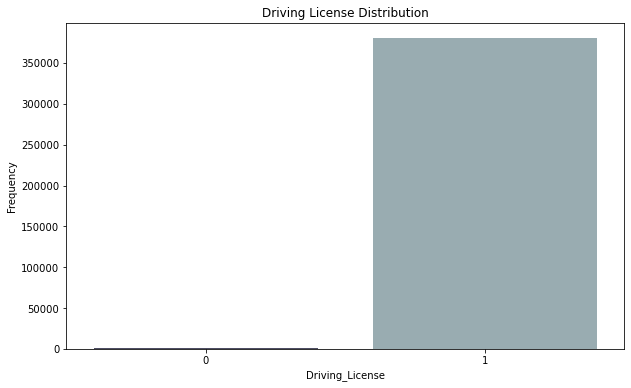

In [11]:
plt.figure(figsize = (10,6))

print("Driving License - Yes/No")
print(train_data['Driving_License'].value_counts())

sns.countplot(x = train_data['Driving_License'],
              data = train_data,
              palette = 'bone')
plt.title('Driving License Distribution')
plt.ylabel('Frequency')
plt.show()

Summary: 
    
    1) 99% of customers had driving license where 1% of customers falls under the bracket of not having driving licence.
    
    2) We can further analyze in bivariant analysis  and derive more insights.

#### `REGION CODE`

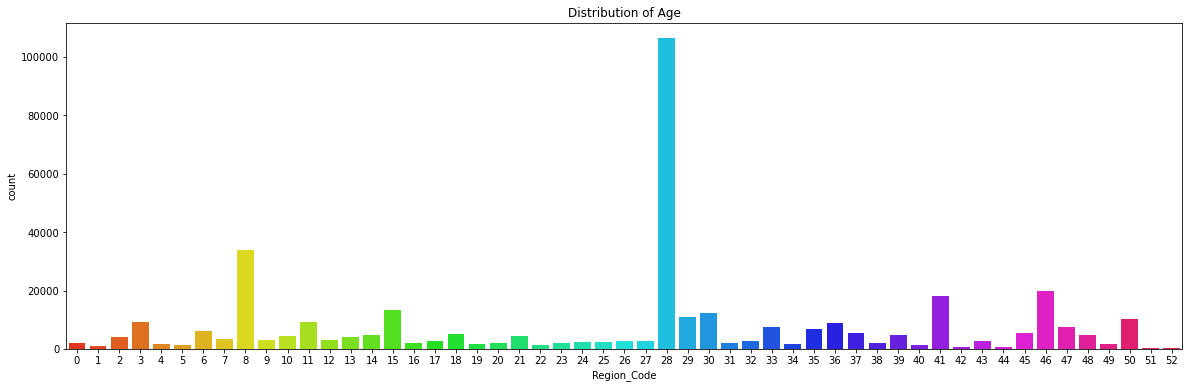

In [12]:
plt.figure(figsize = (20,6))

sns.countplot(train_data['Region_Code'], palette = 'hsv')
plt.title('Distribution of Age')
plt.show()

Summary:
    
    1) Highest number of customers where coming from region 28 followed by 8 , 46 and 41.
    
    2) Rest of the region codes showed very less, less customers as compared to above.
    
    3) We can further analyze in bivariant analysis.

#### `PREVIOUSLY INSURED`

Previously Insured Count:
0    206481
1    174628
Name: Previously_Insured, dtype: int64


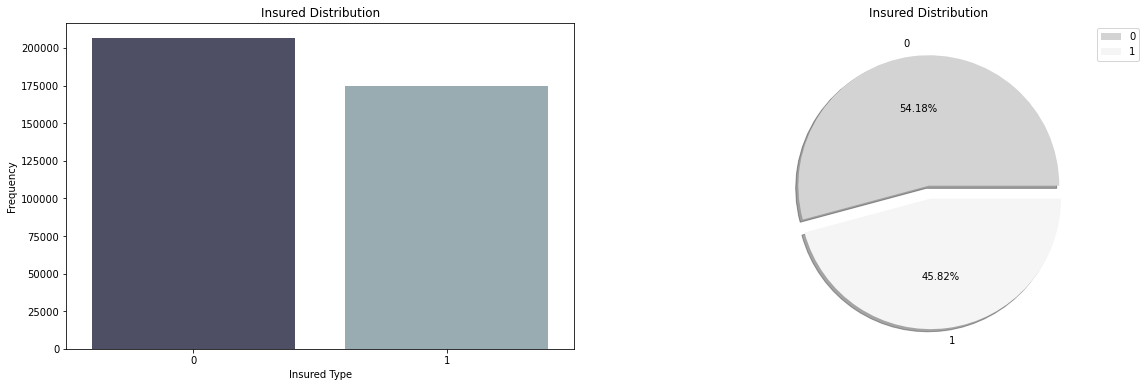

In [13]:
plt.figure(figsize = (20,6))

plt.subplot(1, 2, 1)
print("Previously Insured Count:")
print(train_data['Previously_Insured'].value_counts())

sns.countplot(x = train_data['Previously_Insured'],
              data = train_data,
              palette = 'bone')
plt.title('Insured Distribution')
plt.xlabel('Insured Type')
plt.ylabel('Frequency')


plt.subplot(1, 2, 2)
labels = ['0', '1']
size = train_data['Previously_Insured'].value_counts()
colors = ['lightgrey', 'whitesmoke']
explode = [0, 0.1]

plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Insured Distribution')
plt.axis('off')
plt.legend(loc='upper left', bbox_to_anchor = (1,1))


plt.show()

Summary: 
    
    1) We can see that 54 % (2 Lacks) did not had insurance where as 45 % (1.75 Lacks) of customers had insurance.
   
   
    2) We can analyze later what was the response of the customers having insurance, having insurance & driving license.

#### `VEHICLE AGE`

Vehicle Age Count:
1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64


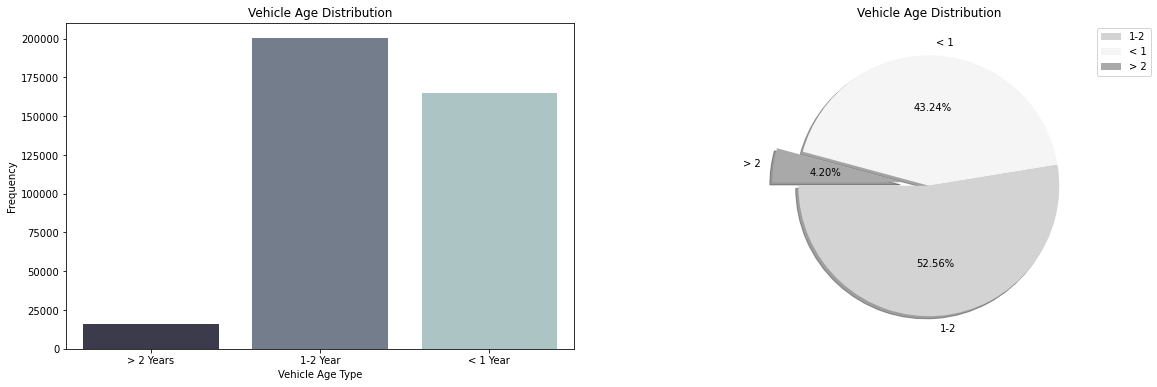

In [14]:
plt.figure(figsize = (20,6))

plt.subplot(1, 2, 1)
print("Vehicle Age Count:")
print(train_data['Vehicle_Age'].value_counts())

sns.countplot(x = train_data['Vehicle_Age'],
              data = train_data,
              palette = 'bone')
plt.title('Vehicle Age Distribution')
plt.xlabel('Vehicle Age Type')
plt.ylabel('Frequency')


plt.subplot(1, 2, 2)
labels = ['1-2', '< 1', '> 2']
size = train_data['Vehicle_Age'].value_counts()
colors = ['lightgrey', 'whitesmoke', 'darkgrey']
explode = [0, 0, 0.2]

plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%', startangle=180)
plt.title('Vehicle Age Distribution')
plt.axis('off')
plt.legend(loc='upper left', bbox_to_anchor = (1,1))


plt.show()

Summary:
    
    1) Most of the customers vehicle's age was between 1-2 years followed by less than a year.

    2) We recored least nos of customers whose vehicle age was more than 2 years.

#### `VECHILE DAMAGE`

Vehicle_Damage Count:
Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64


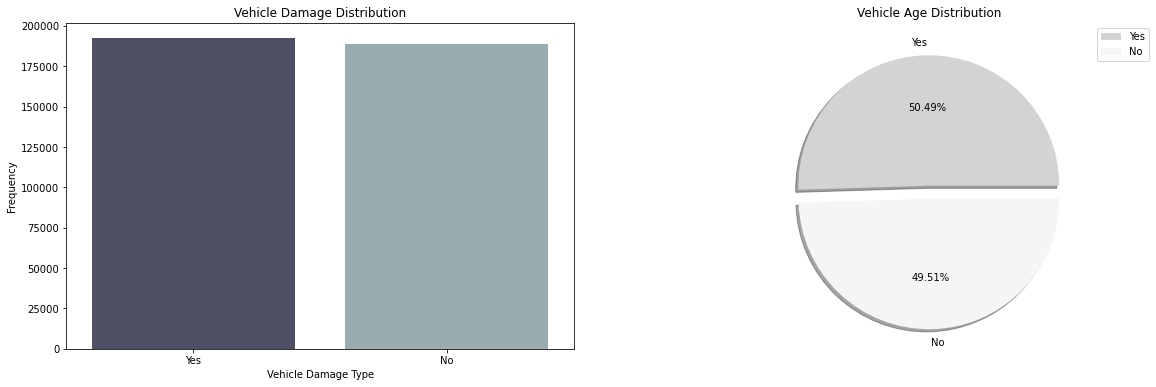

In [15]:
plt.figure(figsize = (20,6))

plt.subplot(1, 2, 1)
print('Vehicle_Damage Count:')
print(train_data['Vehicle_Damage'].value_counts())

sns.countplot(x = train_data['Vehicle_Damage'],
              data = train_data,
              palette = 'bone')
plt.title('Vehicle Damage Distribution')
plt.xlabel('Vehicle Damage Type')
plt.ylabel('Frequency')


plt.subplot(1, 2, 2)
labels = ['Yes', 'No']
size = train_data['Vehicle_Damage'].value_counts()
colors = ['lightgrey', 'whitesmoke']
explode = [0, 0.1]

plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Vehicle Age Distribution')
plt.axis('off')
plt.legend(loc='upper left', bbox_to_anchor = (1,1))


plt.show()

Summary:
    
    1) Approximatly same amount of distribution is observed for Vehicle_Damage_Type.
    
    2) We can further analyz as to which Damage type received more response.

#### `ANNUAL PREMIUM`

Skewness : 1.7660872148961309, Kurtosis : 34.004568696114696


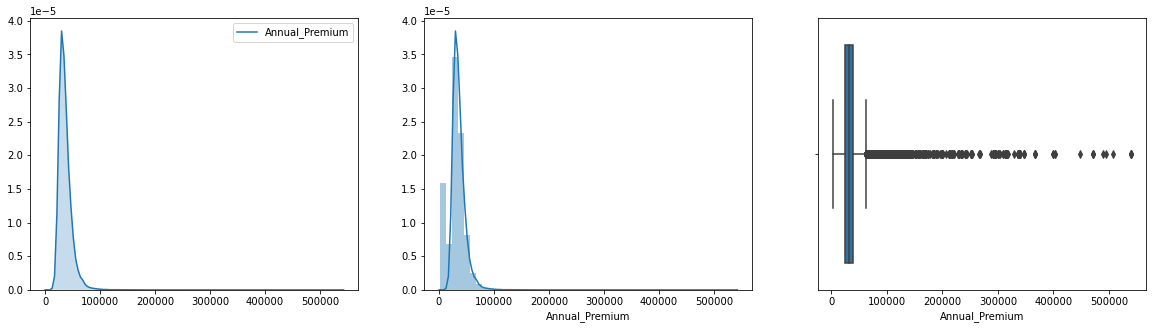

In [16]:
    plt.figure(figsize = (20,5))

    plt.subplot(1,3,1)
    sns.kdeplot(train_data['Annual_Premium'], shade=True)

    plt.subplot(1,3,2)
    sns.distplot(train_data['Annual_Premium'])

    plt.subplot(1,3,3)
    sns.boxplot(train_data['Annual_Premium'], orient = 'horizontal')

    print("Skewness : {}, Kurtosis : {}".format(train_data['Annual_Premium'].skew(), train_data['Annual_Premium'].kurtosis()))
    plt.show()

Summary:
    
    1) Skewness > 0 -> Right Skewed, Kurtosis > 0 (Platykurtic) -> More values distributed across tails.
    
    2) Outliers are observed which needs to be taken care.

#### `POLICY SALES CHANNEL`

Skewness : -0.9000081235103394, Kurtosis : -0.9708101781380822


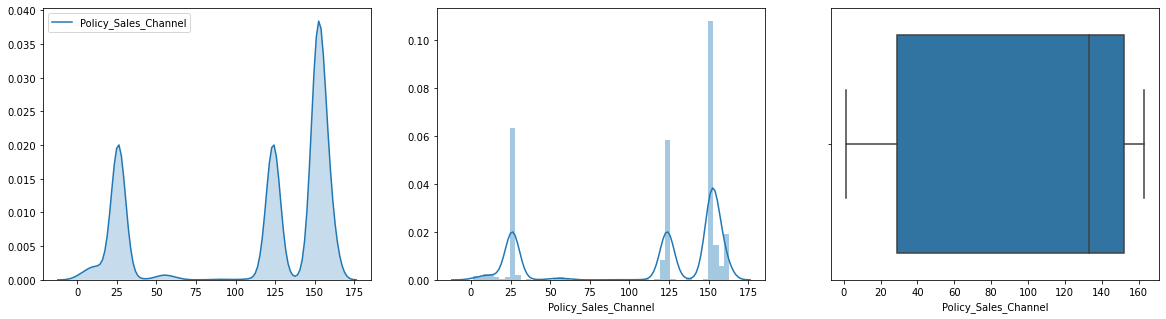

In [17]:
plt.figure(figsize = (20,5))

plt.subplot(1,3,1)
sns.kdeplot(train_data['Policy_Sales_Channel'], shade=True)

plt.subplot(1,3,2)
sns.distplot(train_data['Policy_Sales_Channel'])

plt.subplot(1,3,3)
sns.boxplot(train_data['Policy_Sales_Channel'], orient = 'horizontal')

print("Skewness : {}, Kurtosis : {}".format(train_data['Policy_Sales_Channel'].skew(), train_data['Policy_Sales_Channel'].kurtosis()))
plt.show()

Summary:
    
    1) No outliers are observed.
    
    

#### `VINTAGE`

Skewness : 0.0030295168899980816, Kurtosis : -1.2006880422961197


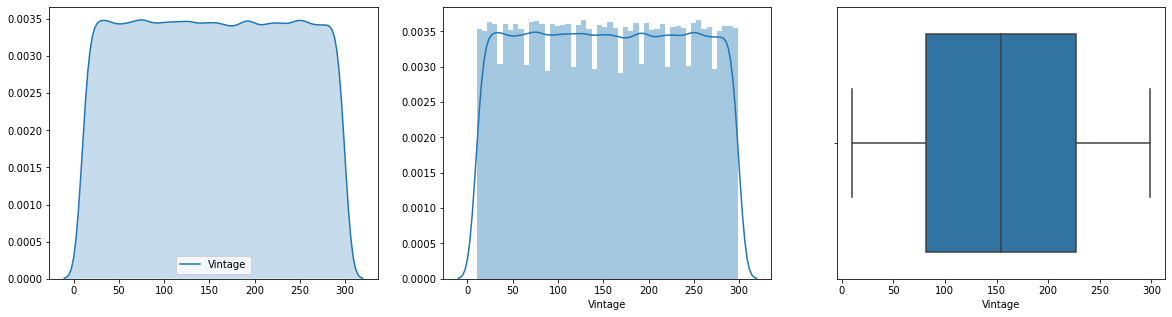

In [18]:
plt.figure(figsize = (20,5))

plt.subplot(1,3,1)
sns.kdeplot(train_data['Vintage'], shade=True)

plt.subplot(1,3,2)
sns.distplot(train_data['Vintage'])

plt.subplot(1,3,3)
sns.boxplot(train_data['Vintage'], orient = 'horizontal')

print("Skewness : {}, Kurtosis : {}".format(train_data['Vintage'].skew(), train_data['Vintage'].kurtosis()))
plt.show()

Summary:
    
    1) From the visualization above we can see that, Vintage column is having uniform distribution.

<br>

> > __`BIVARIANT ANALYSIS`__

In [19]:
def categorical_categorical(col1):
    a = pd.crosstab(index = train_data[col1], columns = train_data['Response'])
    print(a.unstack())

    a.plot(kind = 'bar', stacked = True)
    plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
    plt.show()  

Response  Gender
0         Female    156835
          Male      177564
1         Female     18185
          Male       28525
dtype: int64


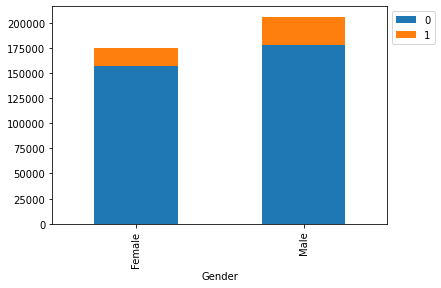

Response  Driving_License
0         0                     771
          1                  333628
1         0                      41
          1                   46669
dtype: int64


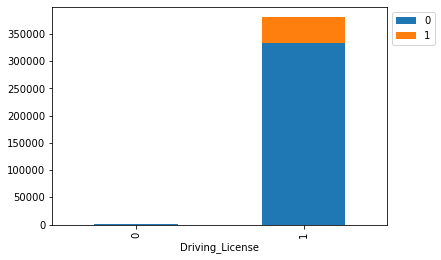

Response  Previously_Insured
0         0                     159929
          1                     174470
1         0                      46552
          1                        158
dtype: int64


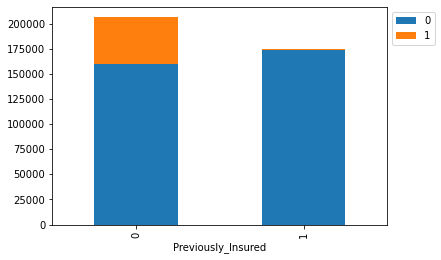

Response  Vehicle_Age
0         1-2 Year       165510
          < 1 Year       157584
          > 2 Years       11305
1         1-2 Year        34806
          < 1 Year         7202
          > 2 Years        4702
dtype: int64


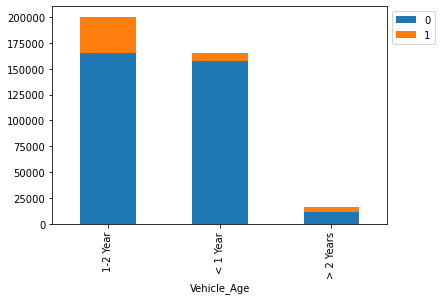

Response  Vehicle_Damage
0         No                187714
          Yes               146685
1         No                   982
          Yes                45728
dtype: int64


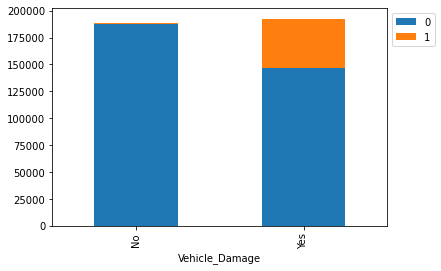

In [20]:
categorical_columns = ['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage']

for col1 in categorical_columns:
    categorical_categorical(col1)

Summary

    1) Male's where more intrested for the Vehicle Response as compared to Females.
    
    2) People those who had driving license where more likely to go for Vehicle Insurance.
    
    3) Also we could see people those who where not insured before wanted to go for new insurance policy offered by company.
    
    4) There was decrease in the trend observed for Vehicle_Age and Response -> 1-2 > less than 1 > more than 2.
    
    5) Most of the people whose vehicle was damaged where more likely to go for Vehicle Insurance.

[]

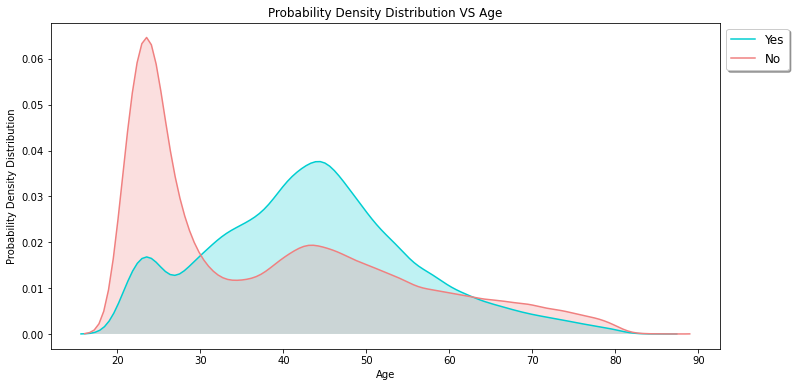

In [21]:
plt.figure(figsize = (12,6))
sns.kdeplot(train_data.Age[train_data.Response == 1], shade = True,  color = 'darkturquoise')
sns.kdeplot(train_data.Age[train_data.Response == 0], shade = True,  color = 'lightcoral')
plt.legend(['Yes', 'No'], loc = 'upper left', bbox_to_anchor = (1,1), prop={'size':12}, frameon=True, fancybox=True, shadow=True, framealpha=1)
plt.xlabel('Age')
plt.ylabel('Probability Density Distribution')
plt.title('Probability Density Distribution VS Age')
plt.plot()

Summary:
    
    1) Customers between 20-30 years of age have very less probabilty of not going with the insurance.
    
    2) Persons falling between 30-55 age group have more chances of puchasing the Vehicle Insurance.
    
    3) Beyond 55+ years of age we see a slight decline in the interest among teh customers toward Vehicle Insurance.

<br>

> > __`MULTIVARIANT ANALYSIS`__

Suppose a customers who prescribed for health insurance previously and may or may not be interested in vehicle insurance so the company will look for the `Age` and `Damage` parameters, as the premium will vary.

In [22]:
pd.crosstab(index = [train_data['Previously_Insured'], train_data['Vehicle_Age'], train_data['Vehicle_Damage']], columns = train_data['Response'])

Response                                            0      1
Previously_Insured Vehicle_Age Vehicle_Damage               
0                  1-2 Year    No               12106    557
                               Yes              88174  34154
                   < 1 Year    No               10966    353
                               Yes              37423   6787
                   > 2 Years   No                   8      0
                               Yes              11252   4701
1                  1-2 Year    No               59389     39
                               Yes               5841     56
                   < 1 Year    No              105238     33
                               Yes               3957     29
                   > 2 Years   No                   7      0
                               Yes                 38      1

<br>


> > __`HANDLING CATEGORICAL VALUE`__

In [23]:
# Gender
train_data['Gender'].replace({
    'Male'  : 1,
    'Female': 0
}, inplace = True)

test_data['Gender'].replace({
    'Male'  : 1,
    'Female': 0
}, inplace = True)


# Vehicle Age
train_data['Vehicle_Age'].replace({
    '< 1 Year' : 0,
    '1-2 Year' : 1,
    '> 2 Years': 2
}, inplace = True)

test_data['Vehicle_Age'].replace({
    '< 1 Year' : 0,
    '1-2 Year' : 1,
    '> 2 Years': 2
}, inplace = True)


# Vehicle Damage
train_data['Vehicle_Damage'].replace({
    'Yes' : 1,
    'No'  : 0
}, inplace = True)

test_data['Vehicle_Damage'].replace({
    'Yes' : 1,
    'No'  : 0
}, inplace = True)

<br>

(12.5, -0.5)

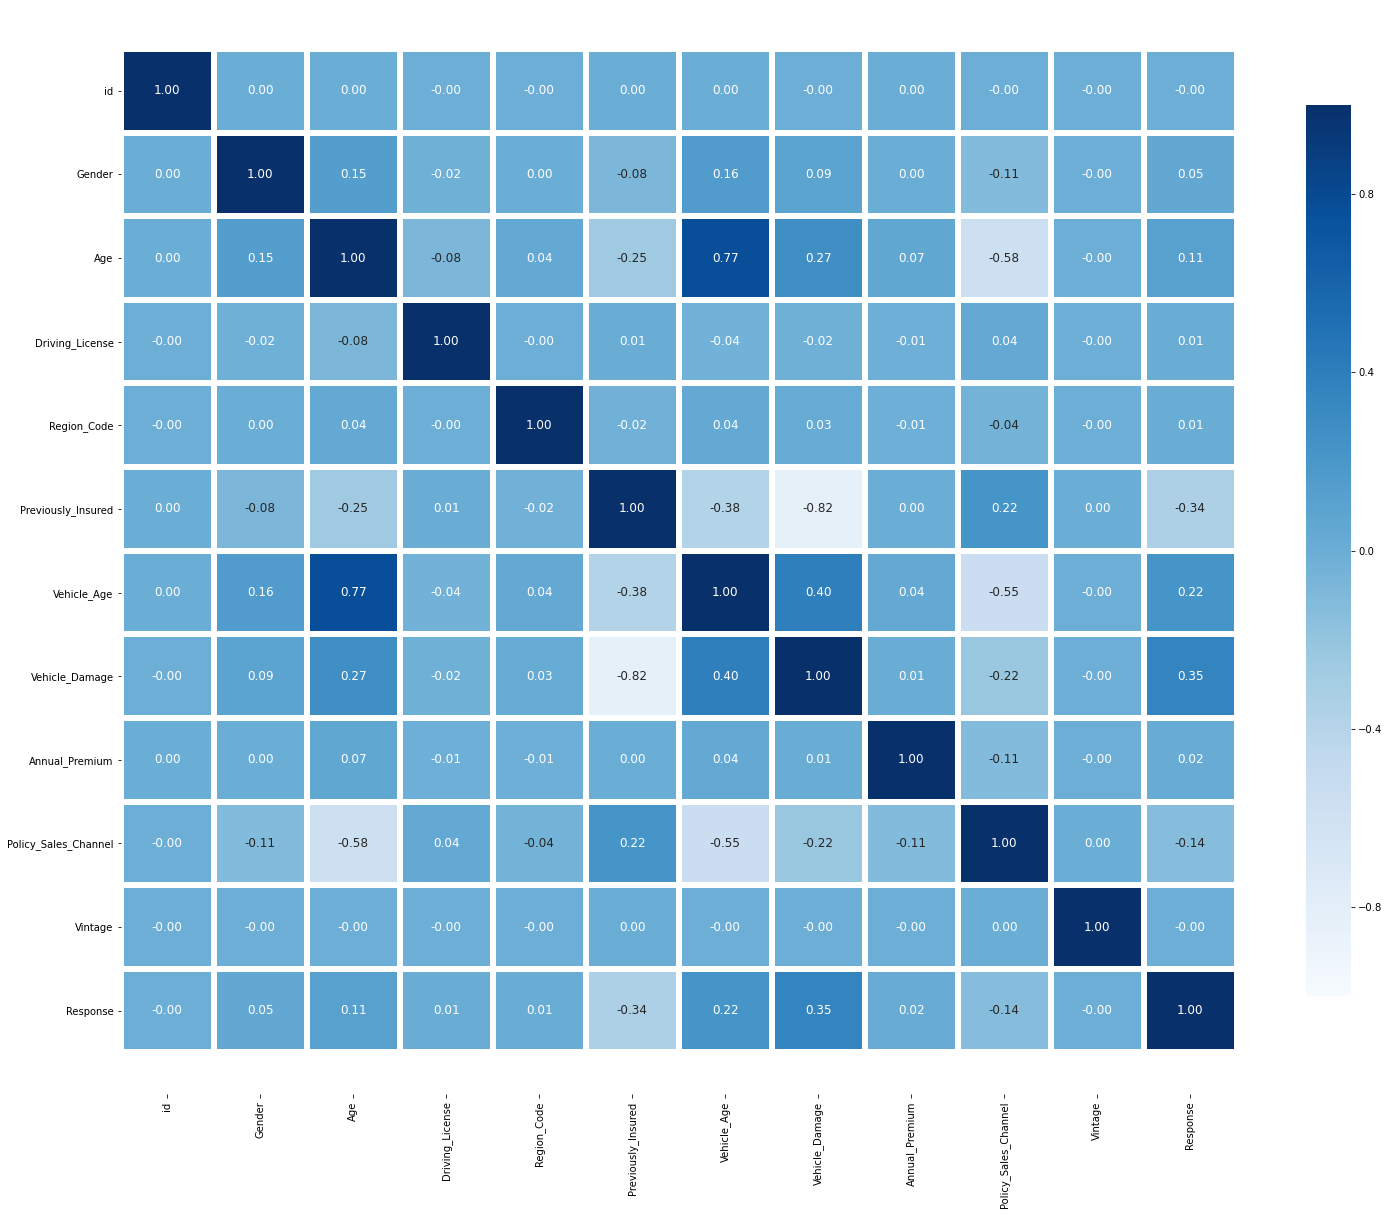

In [24]:
plt.figure(figsize = (25,20))
ax = sns.heatmap(train_data.corr(method= 'pearson'), 
                 linewidths=5, 
                 annot=True, 
                 fmt='.2f',
                 cmap='Blues',
                 annot_kws={"size": 12}, 
                 cbar_kws={"shrink": .82},
                 vmin=-1, 
                 vmax=1, 
                 center= 0,
                 yticklabels=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
#plt.yticks(rotation = 0)      

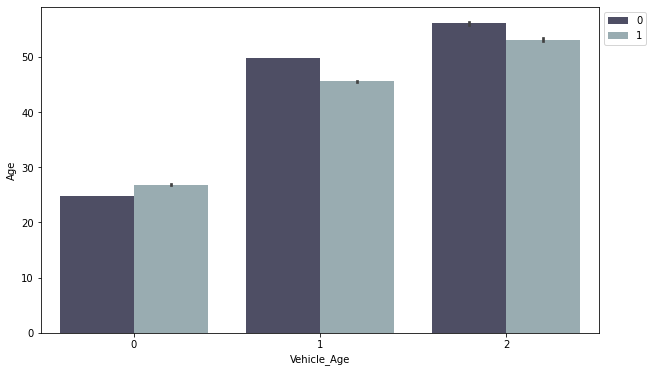

In [25]:
plt.figure(figsize = (10,6))
sns.barplot(x = 'Vehicle_Age',
            y = 'Age',
            data = train_data,
            hue = 'Response',
            palette = 'bone')
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
plt.show()

    - As the age of the vehicle increase, generation gap also increases.
    
    - Age variable is highly related to Vehicle_Age parameter.

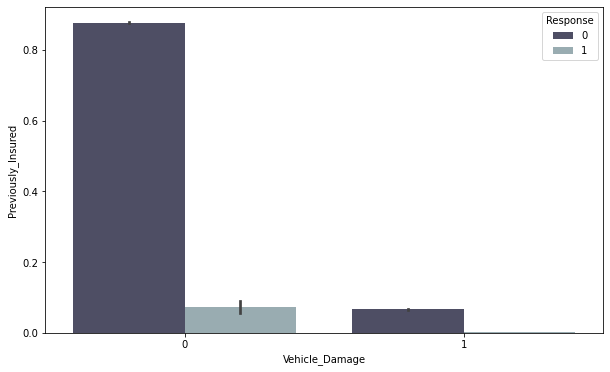

In [26]:
plt.figure(figsize = (10,6))
sns.barplot(x = 'Vehicle_Damage',
            y = 'Previously_Insured',
            data = train_data,
            hue = 'Response',
            palette = 'bone')
plt.show()

     - Vehicle_Damage and Previously_Insured are highly negative related with each other.

In [27]:
train_data_copy = train_data.copy()

test_data_copy  = test_data.copy()

<br>

In [29]:
# Dropping Vintage as no importance to target Response 

train_data_copy.drop(columns = 'Vintage',
                     axis = 1,
                     inplace = True)

test_data_copy.drop(columns = 'Vintage',
                    axis = 1,
                    inplace = True)

In [31]:
# Taking log of Annual Income 

train_data_copy['Annual_Premium'] = np.log1p(train_data_copy['Annual_Premium'])
test_data_copy['Annual_Premium'] = np.log1p(test_data_copy['Annual_Premium'])

In [65]:
train_data_copy.head(3)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Response,Age_Premium_Mean,Region_Premium_Mean,Policy_Sales_Premium_Mean,VehicleA&D_Premium_Mean,Age_Insured_Premium_Mean
0,1,1,44,1,28,0,2,1,10.607946,26.0,1,10.017335,10.356058,10.124975,10.143414,10.032940
1,2,1,76,1,3,0,1,0,10.420405,26.0,0,10.127091,9.775790,10.124975,9.959893,10.115729
2,3,1,47,1,28,0,2,1,10.553075,26.0,1,9.997949,10.356058,10.124975,10.143414,9.997968


In [36]:
train_data_copy['Age_Premium_Mean'] = train_data_copy.groupby(by = ['Age'])["Annual_Premium"].transform('mean')
train_data_copy['Region_Premium_Mean'] = train_data_copy.groupby(by = ['Region_Code'])["Annual_Premium"].transform('mean')
train_data_copy['Policy_Sales_Premium_Mean'] = train_data_copy.groupby(by = ['Policy_Sales_Channel'])["Annual_Premium"].transform('mean')

test_data_copy['Age_Premium_Mean'] = test_data_copy.groupby(by = ['Age'])["Annual_Premium"].transform('mean')
test_data_copy['Region_Premium_Mean'] = test_data_copy.groupby(by = ['Region_Code'])["Annual_Premium"].transform('mean')
test_data_copy['Policy_Sales_Premium_Mean'] = test_data_copy.groupby(by = ['Policy_Sales_Channel'])["Annual_Premium"].transform('mean')

In [38]:
train_data_copy['VehicleA&D_Premium_Mean'] = train_data_copy.groupby(by = ['Vehicle_Age', 'Vehicle_Damage'])["Annual_Premium"].transform('mean')
test_data_copy['VehicleA&D_Premium_Mean'] = test_data_copy.groupby(by = ['Vehicle_Age', 'Vehicle_Damage'])["Annual_Premium"].transform('mean')

In [41]:
train_data_copy['Age_Insured_Premium_Mean'] = train_data_copy.groupby(by = ['Age', 'Previously_Insured'])["Annual_Premium"].transform('mean')
test_data_copy['Age_Insured_Premium_Mean'] = test_data_copy.groupby(by = ['Age', 'Previously_Insured'])["Annual_Premium"].transform('mean')


### `STEP 4: FEATURE ENGINEERING`

#### `GENDER - FEATURES`

In [ ]:
# Feature 1

a = train_data_copy.groupby(by = ['Gender','Vehicle_Age']).size().reset_index()
a.columns = ['Gender', 'Vehicle_Age', 'Gender_Vehicle_Age_count']
train_data_copy = pd.merge(train_data_copy, a, on = ['Gender','Vehicle_Age'], how = 'left')


b = test_data_copy.groupby(by = ['Gender','Vehicle_Age']).size().reset_index()
b.columns = ['Gender', 'Vehicle_Age', 'Gender_Vehicle_Age_count']
test_data_copy = pd.merge(test_data_copy, b, on = ['Gender','Vehicle_Age'], how = 'left')

In [ ]:
# Feature 2

a = train_data_copy.groupby(by = ['Gender', 'Vehicle_Damage']).size().reset_index()
a.columns = ['Gender', 'Vehicle_Damage', 'Gender_Vehicle_Damage_count']
train_data_copy = pd.merge(train_data_copy, a, on = ['Gender', 'Vehicle_Damage'], how = 'left')

b = test_data_copy.groupby(by = ['Gender', 'Vehicle_Damage']).size().reset_index()
b.columns = ['Gender', 'Vehicle_Damage', 'Gender_Vehicle_Damage_count']
test_data_copy = pd.merge(test_data_copy, b, on = ['Gender', 'Vehicle_Damage'], how = 'left')

In [ ]:
# Feature 3

a = train_data_copy.groupby(by = ['Gender', 'Previously_Insured']).size().reset_index()
a.columns = ['Gender', 'Previously_Insured', 'Gender_Insured_count']
train_data_copy = pd.merge(train_data_copy, a, on = ['Gender', 'Previously_Insured'], how = 'left')

b = test_data_copy.groupby(by = ['Gender', 'Previously_Insured']).size().reset_index()
b.columns = ['Gender', 'Previously_Insured', 'Gender_Insured_count']
test_data_copy = pd.merge(test_data_copy, b, on = ['Gender', 'Previously_Insured'], how = 'left')

In [ ]:
# Feature 4

a = train_data_copy.groupby(by = ['Gender', 'Policy_Sales_Channel']).size().reset_index()
a.columns = ['Gender', 'Policy_Sales_Channel', 'Gender_Channel_count']
train_data_copy = pd.merge(train_data_copy, a, on = ['Gender', 'Policy_Sales_Channel'], how = 'left')

b = test_data_copy.groupby(by = ['Gender', 'Policy_Sales_Channel']).size().reset_index()
b.columns = ['Gender', 'Policy_Sales_Channel', 'Gender_Channel_count']
test_data_copy = pd.merge(test_data_copy, b, on = ['Gender', 'Policy_Sales_Channel'], how = 'left')

In [ ]:
# Feature 5

a = train_data_copy.groupby(by = ['Gender', 'Age']).size().reset_index()
a.columns = ['Gender', 'Age', 'Gender_Age_count']
train_data_copy = pd.merge(train_data_copy, a, on = ['Gender', 'Age'], how = 'left')

b = test_data_copy.groupby(by = ['Gender', 'Age']).size().reset_index()
b.columns = ['Gender', 'Age', 'Gender_Age_count']
test_data_copy = pd.merge(test_data_copy, b, on = ['Gender', 'Age'], how = 'left')

In [ ]:
plt.figure(figsize = (25,20))
ax = sns.heatmap(train_data_copy.corr(method= 'pearson'), 
                 linewidths=5, 
                 annot=True, 
                 fmt='.2f',
                 cmap='Blues',
                 annot_kws={"size": 12}, 
                 cbar_kws={"shrink": .82},
                 vmin=-1, 
                 vmax=1, 
                 center= 0,
                 yticklabels=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
#plt.yticks(rotation = 0) 

In [ ]:
# We will drop gender variable as less correlated with features 

train_data_copy.drop(columns = 'Gender',
                axis = 1,
                inplace = True)

test_data_copy.drop(columns = 'Gender',
               axis = 1,
               inplace = True)

In [ ]:
plt.figure(figsize = (25,20))
ax = sns.heatmap(train_data_copy.corr(method= 'pearson'), 
                 linewidths=5, 
                 annot=True, 
                 fmt='.2f',
                 cmap='Blues',
                 annot_kws={"size": 12}, 
                 cbar_kws={"shrink": .82},
                 vmin=-1, 
                 vmax=1, 
                 center= 0,
                 yticklabels=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
#plt.yticks(rotation = 0) 

In [ ]:
# Dropping Gender_Age_count

train_data_copy.drop(columns = 'Gender_Vehicle_Age_count',
                     axis = 1, inplace = True)

test_data_copy.drop(columns = 'Gender_Vehicle_Age_count',
                     axis = 1, inplace = True)

In [ ]:
plt.figure(figsize = (25,20))
ax = sns.heatmap(train_data_copy.corr(method= 'pearson'), 
                 linewidths=5, 
                 annot=True, 
                 fmt='.2f',
                 cmap='Blues',
                 annot_kws={"size": 12}, 
                 cbar_kws={"shrink": .82},
                 vmin=-1, 
                 vmax=1, 
                 center= 0,
                 yticklabels=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
#plt.yticks(rotation = 0) 

<br>

#### `AGE - FEATURES`

In [ ]:
# Feature 1

a = train_data_copy.groupby(by = ['Age','Region_Code']).size().reset_index()
a.columns = ['Age', 'Region_Code', 'Age_Region_Code_count']
train_data_copy = pd.merge(train_data_copy, a, on = ['Age','Region_Code'], how = 'left')

b = test_data_copy.groupby(by = ['Age','Region_Code']).size().reset_index()
b.columns = ['Age', 'Region_Code', 'Age_Region_Code_count']
test_data_copy = pd.merge(test_data_copy, b, on = ['Age','Region_Code'], how = 'left')

In [ ]:
# Feature 2

a = train_data_copy.groupby(by = ['Age', 'Previously_Insured']).size().reset_index()
a.columns = ['Age', 'Previously_Insured', 'Age_Previously_Insured_count']
train_data_copy = pd.merge(train_data_copy, a, on = ['Age', 'Previously_Insured'], how = 'left')

b = test_data_copy.groupby(by = ['Age', 'Previously_Insured']).size().reset_index()
b.columns = ['Age', 'Previously_Insured', 'Age_Previously_Insured_count']
test_data_copy = pd.merge(test_data_copy, b, on = ['Age', 'Previously_Insured'], how = 'left')

In [ ]:
# Feature 3

a = train_data_copy.groupby(by = ['Age', 'Vehicle_Damage']).size().reset_index()
a.columns = ['Age', 'Vehicle_Damage', 'Age_Vehicle_Damage_count']
train_data_copy = pd.merge(train_data_copy, a, on = ['Age', 'Vehicle_Damage'], how = 'left')

b = test_data_copy.groupby(by = ['Age', 'Vehicle_Damage']).size().reset_index()
b.columns = ['Age', 'Vehicle_Damage', 'Age_Vehicle_Damage_count']
test_data_copy = pd.merge(test_data_copy, b, on = ['Age', 'Vehicle_Damage'], how = 'left')

In [ ]:
# Feature 4

a = train_data_copy.groupby(by = ['Age', 'Policy_Sales_Channel']).size().reset_index()
a.columns = ['Age', 'Policy_Sales_Channel', 'Age_Policy_Channel_count']
train_data_copy = pd.merge(train_data_copy, a, on = ['Age', 'Policy_Sales_Channel'], how = 'left')

b = test_data_copy.groupby(by = ['Age', 'Policy_Sales_Channel']).size().reset_index()
b.columns = ['Age', 'Policy_Sales_Channel', 'Age_Policy_Channel_count']
test_data_copy = pd.merge(test_data_copy, b, on = ['Age', 'Policy_Sales_Channel'], how = 'left')

In [ ]:
# Feature 5

train_data_copy['Age_Unique_Policy_Sales'] = train_data_copy.groupby(by = ['Age'])['Policy_Sales_Channel'].transform('nunique')
test_data_copy['Age_Unique_Policy_Sales'] = test_data_copy.groupby(by = ['Age'])['Policy_Sales_Channel'].transform('nunique')

In [ ]:
# Feature 6

train_data_copy['Age_Unique_Region_Code'] = train_data_copy.groupby(by = ['Age'])['Region_Code'].transform('nunique')
test_data_copy['Age_Unique_Region_Code']  = test_data_copy.groupby(by = ['Age'])['Region_Code'].transform('nunique')

In [ ]:
plt.figure(figsize = (25,20))
ax = sns.heatmap(train_data_copy.corr(method= 'pearson'), 
                 linewidths=5, 
                 annot=True, 
                 fmt='.2f',
                 cmap='Blues',
                 annot_kws={"size": 12}, 
                 cbar_kws={"shrink": .82},
                 vmin=-1, 
                 vmax=1, 
                 center= 0,
                 yticklabels=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
#plt.yticks(rotation = 0) 

In [ ]:
# Dropping irrelvant columns 

train_data_copy.drop(columns = ['Age_Region_Code_count', 'Age_Previously_Insured_count', 'Age_Vehicle_Damage_count',
                               'Age_Policy_Channel_count' ], inplace = True)


test_data_copy.drop(columns = ['Age_Region_Code_count', 'Age_Previously_Insured_count', 'Age_Vehicle_Damage_count',
                               'Age_Policy_Channel_count' ], inplace = True)

In [ ]:
plt.figure(figsize = (25,20))
ax = sns.heatmap(train_data_copy.corr(method= 'pearson'), 
                 linewidths=5, 
                 annot=True, 
                 fmt='.2f',
                 cmap='Blues',
                 annot_kws={"size": 12}, 
                 cbar_kws={"shrink": .82},
                 vmin=-1, 
                 vmax=1, 
                 center= 0,
                 yticklabels=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
#plt.yticks(rotation = 0) 

<br>

#### `REGION_CODE - FEATURES`

In [ ]:
# Feature 1

a = train_data_copy.groupby(by = ['Region_Code', 'Vehicle_Age']).size().reset_index()
a.columns = ['Region_Code', 'Vehicle_Age', 'Region_Vehicleage_count']
train_data_copy = pd.merge(train_data_copy, a, on = ['Region_Code', 'Vehicle_Age'], how = 'left')

b = test_data_copy.groupby(by = ['Region_Code', 'Vehicle_Age']).size().reset_index()
b.columns = ['Region_Code', 'Vehicle_Age', 'Region_Vehicleage_count']
test_data_copy = pd.merge(test_data_copy, b, on = ['Region_Code', 'Vehicle_Age'], how = 'left')

In [ ]:
# Feature 2

a = train_data_copy.groupby(by = ['Region_Code', 'Vehicle_Damage']).size().reset_index()
a.columns = ['Region_Code', 'Vehicle_Damage', 'Region_Vehicledamage_count']
train_data_copy = pd.merge(train_data_copy, a, on = ['Region_Code', 'Vehicle_Damage'], how = 'left')

b = test_data_copy.groupby(by = ['Region_Code', 'Vehicle_Damage']).size().reset_index()
b.columns = ['Region_Code', 'Vehicle_Damage', 'Region_Vehicledamage_count']
test_data_copy = pd.merge(test_data_copy, b, on = ['Region_Code', 'Vehicle_Damage'], how = 'left')

In [ ]:
# Feature 3

a = train_data.groupby(by = ['Region_Code','Previously_Insured']).size().reset_index()
a.columns = ['Region_Code', 'Previously_Insured', 'Region_Insured_count']
train_data_copy = pd.merge(train_data_copy, a, on = ['Region_Code','Previously_Insured'], how  = 'left')

b = test_data.groupby(by = ['Region_Code','Previously_Insured']).size().reset_index()
b.columns = ['Region_Code', 'Previously_Insured', 'Region_Insured_count']
test_data_copy = pd.merge(test_data_copy, b, on = ['Region_Code','Previously_Insured'], how  = 'left')

In [ ]:
# Feature 4

train_data_copy['Region_Unique_Policy_Sales'] = train_data_copy.groupby(by = ['Region_Code'])['Policy_Sales_Channel'].transform('nunique')
test_data_copy['Region_Unique_Policy_Sales'] = test_data_copy.groupby(by = ['Region_Code'])['Policy_Sales_Channel'].transform('nunique')

In [ ]:

plt.figure(figsize = (25,20))
ax = sns.heatmap(train_data_copy.corr(method= 'pearson'), 
                 linewidths=5, 
                 annot=True, 
                 fmt='.2f',
                 cmap='Blues',
                 annot_kws={"size": 12}, 
                 cbar_kws={"shrink": .82},
                 vmin=-1, 
                 vmax=1, 
                 center= 0,
                 yticklabels=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
#plt.yticks(rotation = 0) 

In [ ]:
# Dropping irrelavnt feature 

train_data_copy.drop(columns = ['Region_Vehicleage_count', 'Region_Unique_Policy_Sales'],
                     axis = 1,
                     inplace = True)

test_data_copy.drop(columns = ['Region_Vehicleage_count', 'Region_Unique_Policy_Sales'],
                    axis = 1,
                    inplace = True)

In [ ]:
plt.figure(figsize = (25,20))
ax = sns.heatmap(train_data_copy.corr(method= 'pearson'), 
                 linewidths=5, 
                 annot=True, 
                 fmt='.2f',
                 cmap='Blues',
                 annot_kws={"size": 12}, 
                 cbar_kws={"shrink": .82},
                 vmin=-1, 
                 vmax=1, 
                 center= 0,
                 yticklabels=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
#plt.yticks(rotation = 0) 

In [ ]:
# Dropping Region_Insured_count

train_data_copy.drop(columns  = ['Region_Insured_count'],
                     axis = 1,
                     inplace = True)


test_data_copy.drop(columns  = ['Region_Insured_count'],
                    axis = 1,
                    inplace = True)

In [ ]:

plt.figure(figsize = (25,20))
ax = sns.heatmap(train_data_copy.corr(method= 'pearson'), 
                 linewidths=5, 
                 annot=True, 
                 fmt='.2f',
                 cmap='Blues',
                 annot_kws={"size": 12}, 
                 cbar_kws={"shrink": .82},
                 vmin=-1, 
                 vmax=1, 
                 center= 0,
                 yticklabels=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
#plt.yticks(rotation = 0) 

In [ ]:
# Dropping Gender_Vehicle_Damage_count -> Less correlated with Response

train_data_copy.drop(columns = ['Gender_Vehicle_Damage_count'],
                     axis = 1,
                     inplace = True)

test_data_copy.drop(columns = ['Gender_Vehicle_Damage_count'],
                     axis = 1,
                     inplace = True)

In [ ]:
plt.figure(figsize = (25,20))
ax = sns.heatmap(train_data_copy.corr(method= 'pearson'), 
                 linewidths=5, 
                 annot=True, 
                 fmt='.2f',
                 cmap='Blues',
                 annot_kws={"size": 12}, 
                 cbar_kws={"shrink": .82},
                 vmin=-1, 
                 vmax=1, 
                 center= 0,
                 yticklabels=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
#plt.yticks(rotation = 0) 


<br>

#### `ANNUAL PREMIUM - FEATURES`

In [ ]:
# Feature 1

train_data_copy['Age_Premium_Mean'] = train_data_copy.groupby(by = ['Age'])['Annual_Premium'].transform('mean')
test_data_copy['Age_Premium_Mean'] = test_data_copy.groupby(by = ['Age'])['Annual_Premium'].transform('mean')

In [ ]:
# Feature 2

train_data_copy['Region_Premium_Mean'] = train_data_copy.groupby(by = ['Region_Code'])['Annual_Premium'].transform('mean')
test_data_copy['Region_Premium_Mean']  = test_data_copy.groupby(by = ['Region_Code'])['Annual_Premium'].transform('mean')

In [ ]:
# Feature 3

train_data_copy['Insured_VehicleA&D_Premium_Mean'] = train_data_copy.groupby(by = ['Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage'])['Annual_Premium'].transform('mean')
test_data_copy['Insured_VehicleA&D_Premium_Mean']  = test_data_copy.groupby(by = ['Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage'])['Annual_Premium'].transform('mean')

In [ ]:
# Feature 4

train_data_copy['Sales_Premium_Mean'] = train_data_copy.groupby(by = ['Policy_Sales_Channel'])['Annual_Premium'].transform('mean')
test_data_copy['Sales_Premium_Mean'] = test_data_copy.groupby(by = ['Policy_Sales_Channel'])['Annual_Premium'].transform('mean')

In [ ]:
plt.figure(figsize = (25,20))
ax = sns.heatmap(train_data_copy.corr(method= 'pearson'), 
                 linewidths=5, 
                 annot=True, 
                 fmt='.2f',
                 cmap='Blues',
                 annot_kws={"size": 12}, 
                 cbar_kws={"shrink": .82},
                 vmin=-1, 
                 vmax=1, 
                 center= 0,
                 yticklabels=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
#plt.yticks(rotation = 0) 

<br>

In [ ]:
train_data_copy.shape, test_data_copy.shape

<br>

In [43]:
# Splitting Data - Independent & Dependent 

X = train_data_copy.drop(columns = ['Response', 'id'],
                         axis = 1)

y = train_data_copy['Response']

In [44]:
test_data_copy.drop(columns = 'id',
                    axis = 1,
                    inplace = True)

<br>

In [45]:
X.shape, test_data_copy.shape

((381109, 14), (127037, 14))

In [ ]:
# Splitting Data  - Training and Test

''''
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 43)

'''

In [46]:
import lightgbm as lg
from sklearn.metrics import roc_auc_score,roc_curve, auc

<br>

## `LIGHTGBM`

####  `N_ESTIMATORS`

In [ ]:
#n_estimators = np.linspace(100,5000).astype('int')
#n_estimators

In [ ]:
import time 

n_estimators = np.linspace(100,5000).astype('int')

train_result = []

test_result  = []

start_time = time.time()

for estimators in n_estimators:
    clf = lg.LGBMClassifier(n_estimators = estimators,
                            is_unbalance = True,
                            n_jobs = -1,
                            random_state = 43,
                            objective = 'binary',
                            metric = 'auc')
    
    clf.fit(X_train, y_train)
    
    train_pred = clf.predict(X_train)
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_result.append(roc_auc)
    
    test_pred = clf.predict(X_val)
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_val, test_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_result.append(roc_auc)
    
    
print("Succussfully Completed", "\n")

end_time = time.time()
print("Execution Time : {}".format(end_time - start_time))

In [ ]:
import matplotlib.pyplot as plt

line1 = plt.plot(n_estimators[0:10], train_result[0:10], 'b', label = 'Train')
line2 = plt.plot(n_estimators[0:10], test_result[0:10],  'r', label = 'Test')
plt.ylabel("AUC SCORE")
plt.xlabel("N_ESTIMATORS")
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
plt.show()

Summary:
    
    - More nos of estimators results in overfitting.

In [ ]:
# Training the model between 100 - 200 estimators 

import time 

n_estimators = [100, 125, 150, 175, 200]

train_result = []

test_result  = []

start_time = time.time()

for estimators in n_estimators:
    clf = lg.LGBMClassifier(n_estimators = estimators,
                            is_unbalance = True,
                            n_jobs = -1,
                            random_state = 43,
                            objective = 'binary',
                            metric = 'auc')
    
    clf.fit(X_train, y_train)
    
    train_pred = clf.predict_proba(X_train)[:,1]
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_result.append(roc_auc)
    
    test_pred = clf.predict_proba(X_val)[:,1]
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_val, test_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_result.append(roc_auc)
    
    
print("Succussfully Completed", "\n")

end_time = time.time()
print("Execution Time : {}".format(end_time - start_time))

In [ ]:
import matplotlib.pyplot as plt

line1 = plt.plot(n_estimators, train_result, 'b', label = 'Train')
line2 = plt.plot(n_estimators, test_result,  'r', label = 'Test')
plt.ylabel("AUC SCORE")
plt.xlabel("N_ESTIMATORS")
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
plt.show()

Summary:
    
    - We will finalize 150 as nos. of estimators for LIGHTGBM.

<br>

#### `MAX_DEPTH`

In [ ]:
import time 

max_depths =  np.linspace(1, 30, 30).astype('int')

train_result = []
test_result  = []

start_time = time.time()

for depth in max_depths:
    clf = lg.LGBMClassifier(n_estimators = 150,
                            max_depth = depth,
                            is_unbalance = True,
                            n_jobs = -1,
                            random_state = 43,
                            objective = 'binary',
                            metric = 'auc')
    
    clf.fit(X_train, y_train)
    
    train_pred = clf.predict_proba(X_train)[:,1]
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_result.append(roc_auc)
    
    test_pred = clf.predict_proba(X_val)[:,1]
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_val, test_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_result.append(roc_auc)
    
    
print("Succussfully Completed", "\n")

end_time = time.time()
print("Execution Time : {}".format(end_time - start_time))

In [ ]:
import matplotlib.pyplot as plt

line1 = plt.plot(max_depths, train_result, 'b', label = 'Train')
line2 = plt.plot(max_depths, test_result,  'r', label = 'Test')
plt.ylabel("AUC SCORE")
plt.xlabel("MAX_DEPTHS")
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
plt.show()

Summary:
    
    - We will finalize our max_depth as 5

<br>

#### `BOOSTING`

In [ ]:
import time 

boosting =  ['gbdt', 'dart']

train_result = []
test_result  = []

start_time = time.time()

for boost in boosting:
    clf = lg.LGBMClassifier(n_estimators = 150,
                            max_depth = 5,
                            boosting = boost,
                            is_unbalance = True,
                            n_jobs = -1,
                            random_state = 43,
                            objective = 'binary',
                            metric = 'auc')
    
    clf.fit(X_train, y_train)
    
    train_pred = clf.predict_proba(X_train)[:,1]
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_result.append(roc_auc)
    
    test_pred = clf.predict_proba(X_val)[:,1]
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_val, test_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_result.append(roc_auc)
    
    
print("Succussfully Completed", "\n")

end_time = time.time()
print("Execution Time : {}".format(end_time - start_time))

In [ ]:
import matplotlib.pyplot as plt

line1 = plt.plot(boosting, train_result, 'b', label = 'Train')
line2 = plt.plot(boosting, test_result,  'r', label = 'Test')
plt.ylabel("AUC SCORE")
plt.xlabel("BOOSTING TYPE")
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
plt.show()

Summary:

    - We will choose GBDT as our boosting type.

<br>

#### `LEARNING RATE`

In [ ]:
import time 

learn_rate = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]

train_result = []
test_result  = []

start_time = time.time()

for rate in learn_rate:
    clf = lg.LGBMClassifier(n_estimators = 150,
                            max_depth = 5,
                            boosting = 'gbdt',
                            learning_rate = rate,
                            is_unbalance = True,
                            n_jobs = -1,
                            random_state = 43,
                            objective = 'binary',
                            metric = 'auc')
    
    clf.fit(X_train, y_train)
    
    train_pred = clf.predict_proba(X_train)[:,1]
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_result.append(roc_auc)
    
    test_pred = clf.predict_proba(X_val)[:,1]
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_val, test_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_result.append(roc_auc)
    
    
print("Succussfully Completed", "\n")

end_time = time.time()
print("Execution Time : {}".format(end_time - start_time))

In [ ]:
import matplotlib.pyplot as plt

line1 = plt.plot(learn_rate, train_result, 'b', label = 'Train')
line2 = plt.plot(learn_rate, test_result,  'r', label = 'Test')
plt.ylabel("AUC SCORE")
plt.xlabel("LEARNING RATE")
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
plt.show()

Summary

    - We will finalize 0.04 as our learning_rate

<br>

#### `NUM_LEAVES`

In [ ]:
import time 

num_leaves = [15,20,25,30,32]

train_result = []
test_result  = []

start_time = time.time()

for leaves in num_leaves:
    clf = lg.LGBMClassifier(n_estimators = 150,
                            max_depth = 5,
                            num_leaves = leaves,
                            boosting_type = 'gbdt',
                            learning_rate = 0.04,
                            is_unbalance = True,
                            n_jobs = -1,
                            random_state = 43,
                            objective = 'binary',
                            metric = 'auc')
    
    clf.fit(X_train, y_train)
    
    train_pred = clf.predict_proba(X_train)[:,1]
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_result.append(roc_auc)
    
    test_pred = clf.predict_proba(X_val)[:,1]
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_val, test_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_result.append(roc_auc)
    
    
print("Succussfully Completed", "\n")

end_time = time.time()
print("Execution Time : {}".format(end_time - start_time))

In [ ]:
import matplotlib.pyplot as plt

line1 = plt.plot(num_leaves, train_result, 'b', label = 'Train')
line2 = plt.plot(num_leaves, test_result,  'r', label = 'Test')
plt.ylabel("AUC SCORE")
plt.xlabel("NUM_LEAVES")
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
plt.show()

Summary:
    
     - We will set num_leaves = 30

<br>

#### `SUBSAMPLE`

In [ ]:
import time 

sub_sample = [0.6,0.7,0.8,0.9,1]

train_result = []
test_result  = []

start_time = time.time()

for sample in sub_sample:
    clf = lg.LGBMClassifier(n_estimators = 150,
                            max_depth = 5,
                            num_leaves = 30,
                            boosting_type = 'gbdt',
                            learning_rate = 0.04,
                            subsample = sample,
                            is_unbalance = True,
                            n_jobs = -1,
                            random_state = 43,
                            objective = 'binary',
                            metric = 'auc')
    
    clf.fit(X_train, y_train)
    
    train_pred = clf.predict_proba(X_train)[:,1]
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_result.append(roc_auc)
    
    test_pred = clf.predict_proba(X_val)[:,1]
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_val, test_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_result.append(roc_auc)
    
    
print("Succussfully Completed", "\n")

end_time = time.time()
print("Execution Time : {}".format(end_time - start_time))

In [ ]:
import matplotlib.pyplot as plt

line1 = plt.plot(sub_sample, train_result, 'b', label = 'Train')
line2 = plt.plot(sub_sample, test_result,  'r', label = 'Test')
plt.ylabel("AUC SCORE")
plt.xlabel("SUB_SAMPLE")
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
plt.show()

Summary : 
    
    - No change in improvement is observed including this parameter.

#### `COLSAMPLE_BYTREE`

In [ ]:
import time 

colsample_bytree = [0.6,0.7,0.8,0.9,1]

train_result = []
test_result  = []

start_time = time.time()

for sample in colsample_bytree:
    clf = lg.LGBMClassifier(n_estimators = 150,
                            max_depth = 5,
                            num_leaves = 30,
                            boosting_type = 'gbdt',
                            learning_rate = 0.04,
                            colsample_bytree = sample,
                            is_unbalance = True,
                            n_jobs = -1,
                            random_state = 43,
                            objective = 'binary',
                            metric = 'auc')
    
    clf.fit(X_train, y_train)
    
    train_pred = clf.predict_proba(X_train)[:,1]
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_result.append(roc_auc)
    
    test_pred = clf.predict_proba(X_val)[:,1]
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_val, test_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_result.append(roc_auc)
    
    
print("Succussfully Completed", "\n")

end_time = time.time()
print("Execution Time : {}".format(end_time - start_time))

In [ ]:
import matplotlib.pyplot as plt

line1 = plt.plot(colsample_bytree, train_result, 'b', label = 'Train')
line2 = plt.plot(colsample_bytree, test_result,  'r', label = 'Test')
plt.ylabel("AUC SCORE")
plt.xlabel("COLSAMPLE")
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
plt.show()

Summary: 
    
    - We can set colsample_bytree as 0.6

<br>

### `LIGHTGBM - TUNED PARAMETER`

In [47]:
import lightgbm as lg

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=5, shuffle = True, random_state = 43)
scores   = []
predicts = []

for train_index, test_index in kfold.split(X, y):
    X_train, X_val = X.iloc[train_index], X.iloc[test_index]
    y_train, y_val = y.iloc[train_index], y.iloc[test_index]


    # Initializing Model
    clf = lg.LGBMClassifier(n_estimators = 500,
                            max_depth = 5,
                            num_leaves = 20,
                            is_unbalance = True,
                            boosting_type = 'gbdt',
                            learning_rate = 0.05,
                            colsample_bytree = 0.6,
                            objective = 'binary',
                            metric = 'auc',
                            n_jobs =-1,
                            random_state = 43)


    # Training the Ensemble Classifier
    clf.fit(X_train, y_train)

    # Predictions on valid Data
    y_pred = clf.predict(X_val)
    score  = roc_auc_score(y_pred, y_val)
    print(score)
    scores.append(score)
     
    
    predicts.append(clf.predict_proba(test_data_copy)[:,1])
    
print("Avg", np.mean(scores))

0.6351547907079215
0.6351491685985414
0.6349016169355253
0.632816627471899
0.6359762697136052
Avg 0.6347996946854985


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

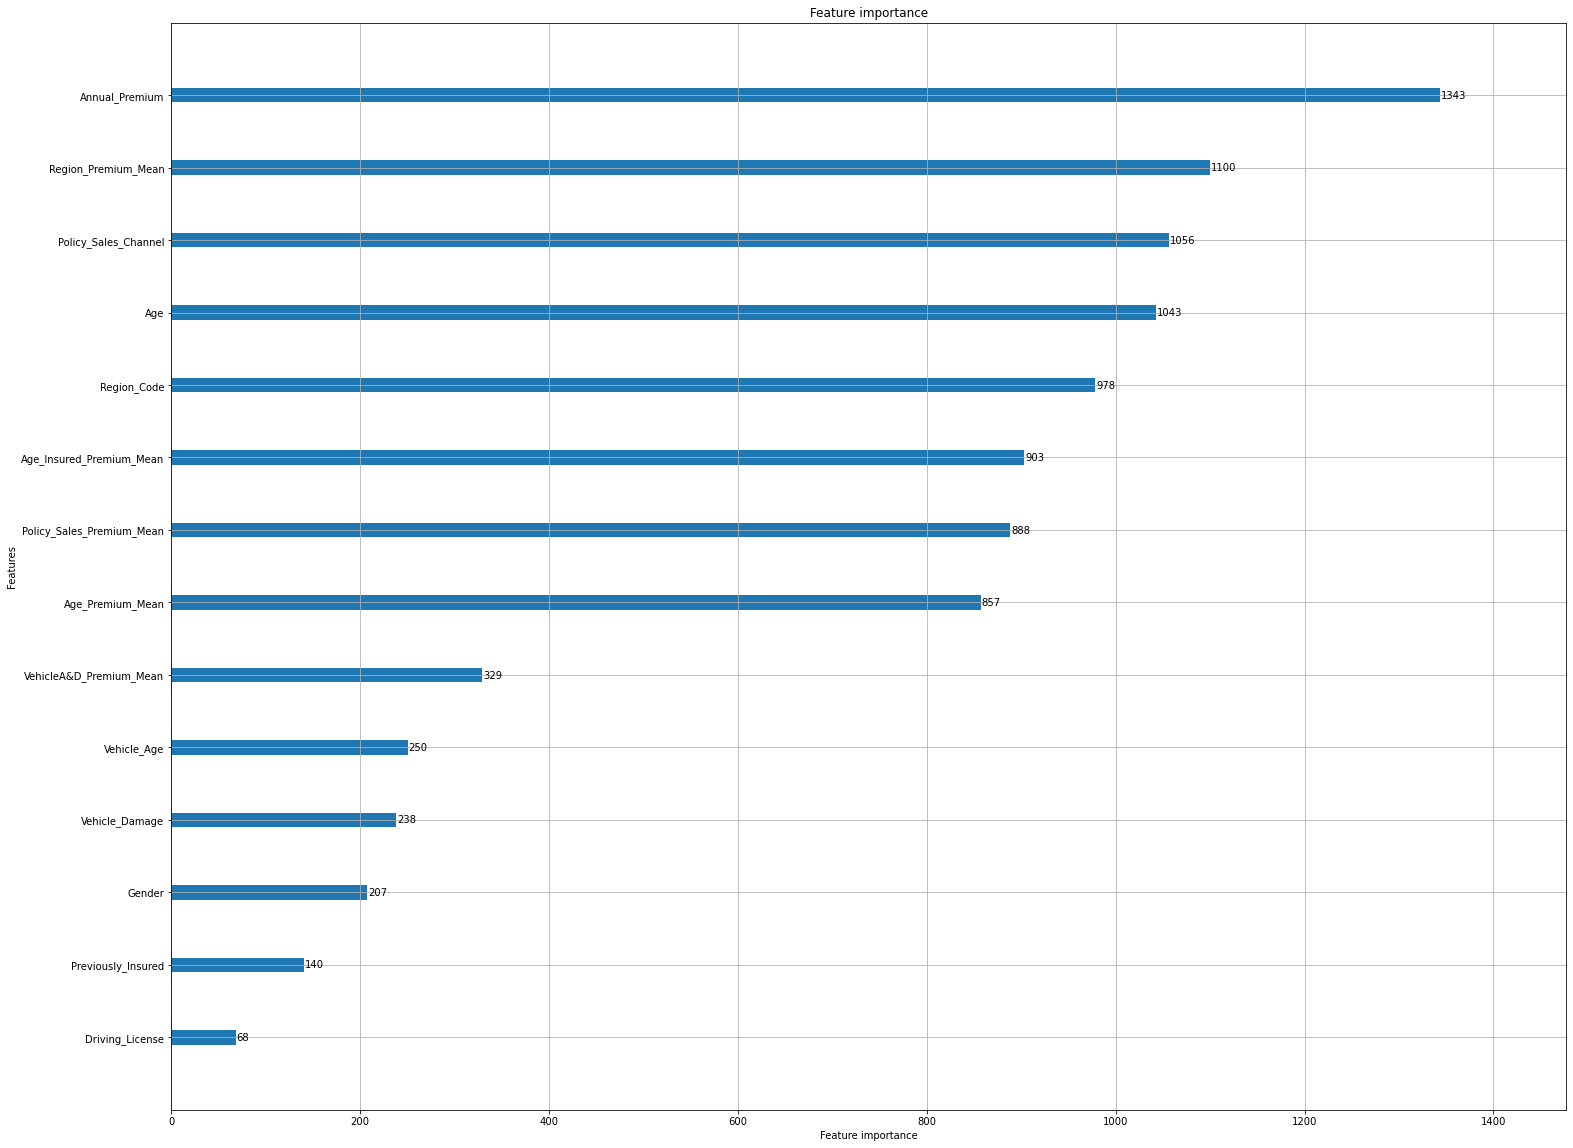

In [48]:
lg.plot_importance(booster = clf,
                   title='Feature importance',
                   xlabel='Feature importance',
                   ylabel='Features',
                   figsize = (25,20),
                   )

In [ ]:
train_data_copy.info()

In [49]:
predict1 = np.mean(predicts, 0)
predict1

array([0.00355552, 0.75359883, 0.7292487 , ..., 0.00199278, 0.00460005,
       0.04312645])

In [50]:
#list = [np.argmax(x) for x in col]
sample_submit = pd.read_csv('sample_submission.csv')
sample_submit['Response'] = predict1
sample_submit.to_csv('sample_submission_Gaurav.csv', index = False)

Summary: 
    
    - N_Estimators (200) -> 0.857006450798286
    
    - N_Estimators (500) -> 0.857683762037881
    
    - N-Estimators (1000)-> 0.857492632678324
    
    - We observe that after 500 estimators we observe slight decrease in th AUC_ROC for test data.
    

While giving new parameters we got very less `AUC_ROC - 0.8443007428700637`.

<br>

## `CATBOOST`

In [51]:
import catboost as cb

In [ ]:
train_data = pd.read_csv('train.csv')

test_data  = pd.read_csv('test.csv')

print("Data Imported Successfully")

In [ ]:
categorical_col = ['Gender','Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage','Policy_Sales_Channel']

In [ ]:
train_data.info()

In [ ]:
# Changing data type because cat_feature in catboost cannot be float

#train_data['Driving_License'] = train_data['Driving_License'].astype('str')
#test_data['Driving_License']  = test_data['Driving_License'].astype('str')

train_data['Region_Code'] = train_data['Region_Code'].astype('int64')
test_data['Region_Code']  = test_data['Region_Code'].astype('int64')

#train_data['Previously_Insured'] = train_data['Previously_Insured'].astype('str')
#test_data['Previously_Insured']  = test_data['Previously_Insured'].astype('str')

train_data['Policy_Sales_Channel'] = train_data['Policy_Sales_Channel'].astype('int64')
test_data['Policy_Sales_Channel']  = test_data['Policy_Sales_Channel'].astype('int64')

In [ ]:
# Splitting Data - Independent & Dependent 

X = train_data.drop(columns = ['id', 'Response'],
                    axis = 1)

y = train_data['Response']

In [ ]:
test_data.drop(columns = 'id',
               axis = 1,
               inplace = True)

In [ ]:
# Splitting Data - Training & Validation

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2,random_state = 43)

<br>

#### `N_ESTIMATORS`

In [ ]:
import time 

n_estimators = np.linspace(100, 500, 5).astype('int')

train_result = []
test_result  = []

start_time = time.time()

for estimators in n_estimators:
    clf = cb.CatBoostClassifier(n_estimators = estimators,
                                random_state = 43,
                                auto_class_weights = 'Balanced',
                                cat_features = categorical_col)
    
    clf.fit(X_train, y_train)
    
    train_pred = clf.predict_proba(X_train)[:,1]
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_result.append(roc_auc)
    
    test_pred = clf.predict_proba(X_val)[:,1]
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_val, test_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_result.append(roc_auc)
    
    
print("Succussfully Completed", "\n")

end_time = time.time()
print("Execution Time : {}".format(end_time - start_time))

In [ ]:
import matplotlib.pyplot as plt

line1 = plt.plot(n_estimators, train_result, 'b', label = 'Train')
line2 = plt.plot(n_estimators, test_result,  'r', label = 'Test')
plt.ylabel("AUC SCORE")
plt.xlabel("N-ESTIMATORS")
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
plt.show()

Summary: 
    
    - We can finalize our n_estimators as 500

<br>

#### `MAX_DEPTH`

In [ ]:
import time 
from sklearn.model_selection import StratifiedKFold

max_depths =  [5, 7, 9, 11]

train_result = []
test_result  = []

start_time = time.time()

kfold = StratifiedKFold(n_splits=3, shuffle = True, random_state = 43)

for depth in max_depths:
    kfold = StratifiedKFold(n_splits=3, shuffle = True, random_state = 43)
    train_scores   = []
    test_scores    = []


    for train_index, test_index in kfold.split(X, y):
        x_tr, x_val = X.iloc[train_index], X.iloc[test_index]
        y_tr, y_val = y.iloc[train_index], y.iloc[test_index]


    # Initializing Model
        clf = cb.CatBoostClassifier(n_estimators = 500,
                                   max_depth = depth,
                                   random_state = 43,
                                   auto_class_weights = 'Balanced',
                                   cat_features = categorical_col,
                                   verbose = 0)


        # Training the Ensemble Classifier
        clf.fit(x_tr, y_tr)

        
        train_pred = clf.predict_proba(x_tr)[:,1]

        false_positive_rate, true_positive_rate, threshold = roc_curve(y_tr, train_pred)
        roc_auc = auc(false_positive_rate, true_positive_rate)
        train_scores.append(roc_auc)

        test_pred = clf.predict_proba(x_val)[:,1]

        false_positive_rate, true_positive_rate, threshold = roc_curve(y_val, test_pred)
        roc_auc = auc(false_positive_rate, true_positive_rate)
        test_scores.append(roc_auc)
        
    train_result.append(np.mean(train_scores))
    test_result.append(np.mean(test_scores))
    
    print("Avg", np.mean(test_scores))
    
    
    
print("Succussfully Completed", "\n")

end_time = time.time()
print("Execution Time : {}".format(end_time - start_time))

In [ ]:
import matplotlib.pyplot as plt

line1 = plt.plot(max_depths, train_result, 'b', label = 'Train')
line2 = plt.plot(max_depths, test_result,  'r', label = 'Test')
plt.ylabel("AUC SCORE")
plt.xlabel("MAX_DEPTH")
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
plt.show()

Summary:
    
    - We would finalize max_depth as 5

**NOTE**:

    1) CATBOOST automatically assigns learning rate while training, so we will not tune that parameter.
  
    2) CATBOOST uses symmetric grow_policy so no setting of num_leaves is required.

<br>

### `CATBOOST TUNED`

In [52]:
import catboost as cb
import time 

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=5, shuffle = True, random_state = 43)
scores   = []
predicts = []

start_time = time.time()
for train_index, test_index in kfold.split(X, y):
    X_train, X_val = X.iloc[train_index], X.iloc[test_index]
    y_train, y_val = y.iloc[train_index], y.iloc[test_index]


    # Initializing Model
    clf = cb.CatBoostClassifier(n_estimators = 500,
                                max_depth = 5,
                                random_state = 43,
                                auto_class_weights = 'Balanced',
                                #cat_features = categorical_col,
                                verbose = 0)


    # Training the Ensemble Classifier
    clf.fit(X_train, y_train)

    # Predictions on valid Data
    y_pred = clf.predict(X_val)
    score  = roc_auc_score(y_pred, y_val)
    print(score)
    scores.append(score)
     
    
    predicts.append(clf.predict_proba(test_data_copy)[:,1])
    
print("Avg", np.mean(scores))

end_time = time.time()
print("\n")
print("Execution Time : {}".format(end_time - start_time))

0.6354571703355796
0.6346546517889132
0.6353823534811965
0.6330098948431635
0.6354436495431436
Avg 0.6347895439983994


Execution Time : 221.45598816871643


In [53]:
predict2 = np.mean(predicts, 0)
predict2

array([5.34987523e-03, 7.59233174e-01, 7.23504741e-01, ...,
       1.53407575e-03, 6.45693706e-04, 1.38305471e-02])

In [54]:
#list = [np.argmax(x) for x in col]
sample_submit = pd.read_csv('sample_submission.csv')
sample_submit['Response'] = predict2
sample_submit.to_csv('sample_submission_GAURAV_CAT.csv', index = False)

Summary:
    
    - N-Estimators (500) -> 0.8581553164  (Took 25-30 mins)
    
    - N-Estimators (1000)-> 0.85815459740 (Took 45-50 mins)
    
    - Increasing the estimators did not gave us beteer performance.

<br>

## `XGBOOST`

In [55]:
import xgboost as xg

In [ ]:
# Importing Dataset

train_data = pd.read_csv('train.csv')

test_data  = pd.read_csv('test.csv')

print("Data Imported Successfully")

In [ ]:
# Gender
train_data['Gender'].replace({
    'Male'  : 1,
    'Female': 0
}, inplace = True)

test_data['Gender'].replace({
    'Male'  : 1,
    'Female': 0
}, inplace = True)


# Vehicle Age
train_data['Vehicle_Age'].replace({
    '< 1 Year' : 0,
    '1-2 Year' : 1,
    '> 2 Years': 2
}, inplace = True)

test_data['Vehicle_Age'].replace({
    '< 1 Year' : 0,
    '1-2 Year' : 1,
    '> 2 Years': 2
}, inplace = True)


# Vehicle Damage
train_data['Vehicle_Damage'].replace({
    'Yes' : 1,
    'No'  : 0
}, inplace = True)

test_data['Vehicle_Damage'].replace({
    'Yes' : 1,
    'No'  : 0
}, inplace = True)

In [ ]:
# Splitting Data - Independent and Dependent 

X = train_data.drop(columns = ['id', 'Response'],
                    axis = 1)

y = train_data["Response"]

In [ ]:
# Splitting Data - Training and Validation

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 43)

In [ ]:
xg.XGBClassifier()

<br>

#### `N_ESTIMATORS`

In [ ]:
import time 
from sklearn.metrics import roc_auc_score, auc, roc_curve

n_estimators = [200,400,600]

train_result = []
test_result  = []

start_time = time.time()

for estimators in n_estimators:
    clf = xg.XGBClassifier(n_estimators = estimators,
                           n_jobs = -1,
                           objective = 'binary:logistic',
                           random_state = 43)
    
    clf.fit(X_train, y_train)
    
    train_pred = clf.predict_proba(X_train)[:,1]
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_result.append(roc_auc)
    
    test_pred = clf.predict_proba(X_valid)[:,1]
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_valid, test_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_result.append(roc_auc)
    
    
print("Succussfully Completed", "\n")

end_time = time.time()
print("Execution Time : {}".format(end_time - start_time))

In [ ]:
import matplotlib.pyplot as plt

line1 = plt.plot(n_estimators, train_result, 'b', label = 'Train')
line2 = plt.plot(n_estimators, test_result,  'r', label = 'Test')
plt.ylabel("AUC SCORE")
plt.xlabel("N-ESTIMATORS")
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
plt.show()

Summary:
    
    - As we saw as nos of estimators increased perfomance decreased.
    
    - We can check for n_estimators between 100-200 

In [ ]:
import time 
from sklearn.metrics import roc_auc_score, auc, roc_curve

n_estimators = [100, 125, 150, 175, 200]

train_result = []
test_result  = []

start_time = time.time()

for estimators in n_estimators:
    clf = xg.XGBClassifier(n_estimators = estimators,
                           n_jobs = -1,
                           objective = 'binary:logistic',
                           random_state = 43)
    
    clf.fit(X_train, y_train)
    
    train_pred = clf.predict_proba(X_train)[:,1]
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_result.append(roc_auc)
    
    test_pred = clf.predict_proba(X_valid)[:,1]
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_valid, test_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_result.append(roc_auc)
    
    
print("Succussfully Completed", "\n")

end_time = time.time()
print("Execution Time : {}".format(end_time - start_time))

line1 = plt.plot(n_estimators, train_result, 'b', label = 'Train')
line2 = plt.plot(n_estimators, test_result,  'r', label = 'Test')
plt.ylabel("AUC SCORE")
plt.xlabel("N-ESTIMATORS")
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
plt.show()

Summary:
    
    - We will finalize our n_estimator value = 100 for now.

<br>

#### `MAX_DEPTH - (default = 6)`

##### **NOTE** : _Increaing this value will make our model more complex and consume more memory_.

In [ ]:
import time 
from sklearn.metrics import roc_auc_score, auc, roc_curve

max_depth = [2,3,4,5,6]

train_result = []
test_result  = []

start_time = time.time()

for depth in max_depth:
    clf = xg.XGBClassifier(n_estimators = 100,
                           max_depth = depth,
                           n_jobs = -1,
                           objective = 'binary:logistic',
                           random_state = 43)
    
    clf.fit(X_train, y_train)
    
    train_pred = clf.predict_proba(X_train)[:,1]
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_result.append(roc_auc)
    
    test_pred = clf.predict_proba(X_valid)[:,1]
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_valid, test_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_result.append(roc_auc)
    
    
print("Succussfully Completed", "\n")

end_time = time.time()
print("Execution Time : {}".format(end_time - start_time))

line1 = plt.plot(max_depth, train_result, 'b', label = 'Train')
line2 = plt.plot(max_depth, test_result,  'r', label = 'Test')
plt.ylabel("AUC SCORE")
plt.xlabel("MAX_DEPTH")
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
plt.show()

Summary : 
    
    We will finalize max_depth = 4

<br>

#### `LEARNING_RATE - (default = 0.3)`

In [ ]:
import time 
from sklearn.metrics import roc_auc_score, auc, roc_curve

learning_rate = [0.2, 0.3, 0.4]

train_result = []
test_result  = []

start_time = time.time()

for rate in learning_rate:
    clf = xg.XGBClassifier(n_estimators = 100,
                           max_depth = 4,
                           eta = rate,
                           n_jobs = -1,
                           objective = 'binary:logistic',
                           random_state = 43)
    
    clf.fit(X_train, y_train)
    
    train_pred = clf.predict_proba(X_train)[:,1]
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_result.append(roc_auc)
    
    test_pred = clf.predict_proba(X_valid)[:,1]
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_valid, test_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_result.append(roc_auc)
    
    
print("Succussfully Completed", "\n")

end_time = time.time()
print("Execution Time : {}".format(end_time - start_time))

line1 = plt.plot(learning_rate, train_result, 'b', label = 'Train')
line2 = plt.plot(learning_rate, test_result,  'r', label = 'Test')
plt.ylabel("AUC SCORE")
plt.xlabel("LEARNING_RATE")
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
plt.show()

Summary :
    
    - We will finalize eta (learning_rate) = 0.3

<br>

#### `BOOSTING_TYPE`

In [ ]:
import time 
from sklearn.metrics import roc_auc_score, auc, roc_curve

boosting_type = ['gbtree', 'dart']

train_result = []
test_result  = []

start_time = time.time()

for boost_type in boosting_type:
    clf = xg.XGBClassifier(n_estimators = 100,
                           max_depth = 4,
                           eta = 0.3,
                           booster = boost_type,
                           n_jobs = -1,
                           objective = 'binary:logistic',
                           random_state = 43)
    
    clf.fit(X_train, y_train)
    
    train_pred = clf.predict_proba(X_train)[:,1]
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_result.append(roc_auc)
    
    test_pred = clf.predict_proba(X_valid)[:,1]
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_valid, test_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_result.append(roc_auc)
    
    
print("Succussfully Completed", "\n")

end_time = time.time()
print("Execution Time : {}".format(end_time - start_time))

line1 = plt.plot(boosting_type, train_result, 'b', label = 'Train')
line2 = plt.plot(boosting_type, test_result,  'r', label = 'Test')
plt.ylabel("AUC SCORE")
plt.xlabel("BOOSTING_TYPE")
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
plt.show()

Summary : 
    
    - We can use default = 'gbtree'

<br>

#### `SUBSAMPLE`

In [ ]:
import time 
from sklearn.metrics import roc_auc_score, auc, roc_curve

subsample = [0.5, 0.6, 0.7, 0.8, 0.9]

train_result = []
test_result  = []

start_time = time.time()

for sample in subsample:
    clf = xg.XGBClassifier(n_estimators = 100,
                           max_depth = 4,
                           eta = 0.3,
                           booster = 'gbtree',
                           subsample = sample,
                           n_jobs = -1,
                           objective = 'binary:logistic',
                           random_state = 43)
    
    clf.fit(X_train, y_train)
    
    train_pred = clf.predict_proba(X_train)[:,1]
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_result.append(roc_auc)
    
    test_pred = clf.predict_proba(X_valid)[:,1]
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_valid, test_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_result.append(roc_auc)
    
    
print("Succussfully Completed", "\n")

end_time = time.time()
print("Execution Time : {}".format(end_time - start_time))

line1 = plt.plot(subsample, train_result, 'b', label = 'Train')
line2 = plt.plot(subsample, test_result,  'r', label = 'Test')
plt.ylabel("AUC SCORE")
plt.xlabel("SUBSAMPLE PERCENTAGE")
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
plt.show()

Summary:
    
    - We can finalize subsample = 0.9

<br>

#### `SCALE_POS_WEIGHT`

**REF** : https://machinelearningmastery.com/xgboost-for-imbalanced-classification/

In [ ]:
y_train.value_counts(normalize = True)

In [ ]:
import collections

# count examples in each class
counter = collections.Counter(y)

# estimate scale_pos_weight value
estimate = counter[0] / counter[1]
print('Estimate: %.3f' % estimate)

In [ ]:
import time 
from sklearn.metrics import roc_auc_score, auc, roc_curve

scale_weigths = [7.159, 700.159, 7000.159, 70000.159, 700000.159]

train_result = []
test_result  = []

start_time = time.time()

for each in scale_weigths:
    clf = xg.XGBClassifier(n_estimators = 100,
                           max_depth = 4,
                           eta = 0.3,
                           booster = 'gbtree',
                           subsample = 0.9,
                           scale_pos_weight = each,
                           n_jobs = -1,
                           objective = 'binary:logistic',
                           random_state = 43)
    
    clf.fit(X_train, y_train)
    
    train_pred = clf.predict_proba(X_train)[:,1]
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_result.append(roc_auc)
    
    test_pred = clf.predict_proba(X_valid)[:,1]
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_valid, test_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_result.append(roc_auc)
    
    
print("Succussfully Completed", "\n")

end_time = time.time()
print("Execution Time : {}".format(end_time - start_time))

line1 = plt.plot(scale_pos_weight, train_result, 'b', label = 'Train')
line2 = plt.plot(scale_pos_weight, test_result,  'r', label = 'Test')
plt.ylabel("AUC SCORE")
plt.xlabel("SUBSAMPLE PERCENTAGE")
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
plt.show()

Summary:
    
    - We can between 0-100000 there is a steep decline in the AUC.
    
    - We can analyze for lesser scale_pos_Weight

In [ ]:
import time 
from sklearn.metrics import roc_auc_score, auc, roc_curve

scale_weigths = [7, 10, 20, 30 , 40, 50, 60, 70, 80, 90, 100]

train_result = []
test_result  = []

start_time = time.time()

for each in scale_weigths:
    clf = xg.XGBClassifier(n_estimators = 100,
                           max_depth = 4,
                           eta = 0.3,
                           booster = 'gbtree',
                           subsample = 0.9,
                           scale_pos_weight = each,
                           n_jobs = -1,
                           objective = 'binary:logistic',
                           random_state = 43)
    
    clf.fit(X_train, y_train)
    
    train_pred = clf.predict_proba(X_train)[:,1]
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_result.append(roc_auc)
    
    test_pred = clf.predict_proba(X_valid)[:,1]
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_valid, test_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_result.append(roc_auc)
    
    
print("Succussfully Completed", "\n")

end_time = time.time()
print("Execution Time : {}".format(end_time - start_time))

line1 = plt.plot(scale_weigths, train_result, 'b', label = 'Train')
line2 = plt.plot(scale_weigths, test_result,  'r', label = 'Test')
plt.ylabel("AUC SCORE")
plt.xlabel("SUBSAMPLE PERCENTAGE")
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
plt.show()

In [ ]:
import time 
from sklearn.metrics import roc_auc_score, auc, roc_curve

scale_weigths = np.linspace(1,20,20).astype('int')

train_result = []
test_result  = []

start_time = time.time()

for each in scale_weigths:
    clf = xg.XGBClassifier(n_estimators = 100,
                           max_depth = 4,
                           eta = 0.3,
                           booster = 'gbtree',
                           subsample = 0.9,
                           scale_pos_weight = each,
                           n_jobs = -1,
                           objective = 'binary:logistic',
                           random_state = 43)
    
    clf.fit(X_train, y_train)
    
    train_pred = clf.predict_proba(X_train)[:,1]
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_result.append(roc_auc)
    
    test_pred = clf.predict_proba(X_valid)[:,1]
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_valid, test_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_result.append(roc_auc)
    
    
print("Succussfully Completed", "\n")

end_time = time.time()
print("Execution Time : {}".format(end_time - start_time))

line1 = plt.plot(scale_weigths, train_result, 'b', label = 'Train')
line2 = plt.plot(scale_weigths, test_result,  'r', label = 'Test')
plt.ylabel("AUC SCORE")
plt.xlabel("SUBSAMPLE PERCENTAGE")
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
plt.show()

Summary:
    
    - We will finalize our scale_pos_weight = 5

<br>

### `XGBOOST TUNED`

In [ ]:
test_data.drop(columns = 'id',
               axis = 1,
               inplace = True)

In [56]:
import xgboost as xg
import time 

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=5, shuffle = True, random_state = 43)
scores   = []
predicts = []

start_time = time.time()
for train_index, test_index in kfold.split(X, y):
    X_train, X_val = X.iloc[train_index], X.iloc[test_index]
    y_train, y_val = y.iloc[train_index], y.iloc[test_index]


    # Initializing Model
    clf = xg.XGBClassifier(n_estimators = 200,
                           max_depth = 3,
                           learning_rate = 0.3,
                           booster = 'gbtree',
                           subsample = 0.9,
                           scale_pos_weight = 5)


    # Training the Ensemble Classifier
    clf.fit(X_train, y_train)

    # Predictions on valid Data
    y_pred = clf.predict(X_val)
    score  = roc_auc_score(y_pred, y_val)
    print(score)
    scores.append(score)
     
    
    predicts.append(clf.predict_proba(test_data_copy)[:,1])
    
print("Avg", np.mean(scores))

end_time = time.time()
print("\n")
print("Execution Time : {}".format(end_time - start_time))

0.6406832810715111
0.6386399156515985
0.6403939470192573
0.6377904213702199
0.6408777177322444
Avg 0.6396770565689662


Execution Time : 114.45214629173279


In [57]:
predict3 = np.mean(predicts, 0)
predict3

array([0.00665265, 0.7383076 , 0.6568235 , ..., 0.00158164, 0.00107561,
       0.00957332], dtype=float32)

In [58]:
#list = [np.argmax(x) for x in col]
sample_submit = pd.read_csv('sample_submission.csv')
sample_submit['Response'] = predict3
sample_submit.to_csv('sample_submission_GAURAV_XGBOOST.csv', index = False)

Summary:
    
    - N_Estimators (100)  -> 0.857491901300129
    
    - N_Estimators (200)  -> 0.857708266757799
    
    - N_Estimators (500)  -> 0.856981177421187
    
    - We can conclude as the value of n_estimators goes high after 200 there is drop in AUC_ROC.

<br>

## LGBM:

Avg 0.6346705711610678, predict1


## CATBOOST:

Avg 0.6358417153089688, predict2

## XGBOOST

Avg 0.6395254094267087, predict3

In [63]:
final_pred = (0.1*predict1 + 0.1*predict2 + 0.8*predict3)
final_pred

array([0.00621266, 0.74192929, 0.67073416, ..., 0.001618  , 0.00138506,
       0.01335436])

In [64]:
#list = [np.argmax(x) for x in col]
sample_submit = pd.read_csv('sample_submission.csv')
sample_submit['Response'] = final_pred
sample_submit.to_csv('sample_submission_GAURAV_ENSEMBLE_2.csv', index = False)

## `ENSEMBLE - CATBOOST,LIGHTGBM & XGBOOST`

In [ ]:
train_data = pd.read_csv('train.csv')

test_data  = pd.read_csv('test.csv')

print("Data imported successfully")

In [ ]:
categorical_col = ['Gender','Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage','Policy_Sales_Channel']

In [ ]:
# Converting Flot - Int (CATBOOST)

train_data['Region_Code'] = train_data['Region_Code'].astype('int64')
test_data['Region_Code']  = test_data['Region_Code'].astype('int64')

train_data['Policy_Sales_Channel'] = train_data['Region_Code'].astype('int64')
test_data['Policy_Sales_Channel']  = test_data['Policy_Sales_Channel'].astype('int64')

In [ ]:
# Gender
train_data['Gender'].replace({
    'Male'  : 1,
    'Female': 0
}, inplace = True)

test_data['Gender'].replace({
    'Male'  : 1,
    'Female': 0
}, inplace = True)


# Vehicle Age
train_data['Vehicle_Age'].replace({
    '< 1 Year' : 0,
    '1-2 Year' : 1,
    '> 2 Years': 2
}, inplace = True)

test_data['Vehicle_Age'].replace({
    '< 1 Year' : 0,
    '1-2 Year' : 1,
    '> 2 Years': 2
}, inplace = True)


# Vehicle Damage
train_data['Vehicle_Damage'].replace({
    'Yes' : 1,
    'No'  : 0
}, inplace = True)

test_data['Vehicle_Damage'].replace({
    'Yes' : 1,
    'No'  : 0
}, inplace = True)

In [ ]:
# Splitting Data - Independent and Dependent

X = train_data.drop(columns = ['id', 'Response'],
                    axis = 1)

y = train_data['Response']

In [ ]:
test_data.drop(columns = ['id'],
               axis = 1,
               inplace = True)

<br>

In [ ]:
import lightgbm as lg
import catboost as cb
import xgboost as xg
import time
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=10, shuffle = True, random_state = 43)
scores   = []
predicts = []

start_time = time.time()
for train_index, test_index in kfold.split(X, y):
    X_train, X_val = X.iloc[train_index], X.iloc[test_index]
    y_train, y_val = y.iloc[train_index], y.iloc[test_index]

    i = 1
    # Initializing Model
    model1 = cb.CatBoostClassifier(n_estimators = 500,
                                   max_depth = 5,
                                   random_state = 43,
                                   auto_class_weights = 'Balanced',
                                   cat_features = categorical_col,
                                   verbose = 0)

    model2 = lg.LGBMClassifier(n_estimators = 500,
                               max_depth = 5,
                               num_leaves = 20,
                               is_unbalance = True,
                               boosting_type = 'gbdt',
                               learning_rate = 0.05,
                               colsample_bytree = 0.6,
                               objective = 'binary',
                               n_jobs =-1,
                               random_state = 43)
    
    model3 = xg.XGBClassifier(n_estimators = 200,
                              max_depth = 3,
                              learning_rate = 0.3,
                              booster = 'gbtree',
                              subsample = 0.9,
                              scale_pos_weight = 5)
    
    
    clf = VotingClassifier(estimators = [('CATBOOST', model1), ('LIGHTGBM', model2), ('XGBOOST', model3)], 
                           voting='soft')


    # Training the Ensemble Classifier
    clf.fit(X_train, y_train)

    # Predictions on valid Data
    y_pred = clf.predict(X_val)
    score  = roc_auc_score(y_pred, y_val)
    print(score)
    scores.append(score)
     
    
    predicts.append(clf.predict_proba(test_data)[:,1])
    
print("Avg", np.mean(scores))

end_time = time.time()
print("\n")
print("Execution Time : {}".format(end_time - start_time))

In [ ]:
col = np.mean(predicts, 0)
col

In [ ]:
#list = [np.argmax(x) for x in col]
sample_submit = pd.read_csv('sample_submission.csv')
sample_submit['Response'] = col
sample_submit.to_csv('sample_submission_ENSEMBLED.csv', index = False)

Summary:
    
    - AUC_ROC acheived when combining CATBOOST & LIGHTGBM            -> 0.849251704601147, Avg 0.6328588218461132
    
    - AUC_ROC acheived when combining CATBOOST< LIGHTGBM and XGBOOST -> 0.850602279647608, Avg 0.6340135188069497
    
    - Looks like ENSEMBLE is not working for this compitition.

In [ ]:
'''
from sklearn.model_selection import train_test_split
X_train, X_tst, y_train, y_tst = train_test_split(X, y, test_size = 0.2,random_state = 43)
'''

In [ ]:
'''
import time 
from sklearn.model_selection import StratifiedKFold

max_depths =  np.linspace(1, 30, 10).astype('int')

train_result = []
test_result  = []
test_result2 = []

start_time = time.time()

kfold = StratifiedKFold(n_splits=3, shuffle = True, random_state = 43)

for depth in max_depths:
    kfold = StratifiedKFold(n_splits=3, shuffle = True, random_state = 43)
    train_scores   = []
    test_scores    = []
    test_scores2   = []
 
    for train_index, test_index in kfold.split(X_train, y_train):
        x_tr, x_val = X_train.iloc[train_index], X.iloc[test_index]
        y_tr, y_val = y_train.iloc[train_index], y.iloc[test_index]


    # Initializing Model
        clf = cb.CatBoostClassifier(n_estimators = 500,
                                   max_depth = depth,
                                   random_state = 43,
                                   auto_class_weights = 'Balanced',
                                   cat_features = categorical_col,
                                   verbose = 0)


        # Training the Ensemble Classifier
        clf.fit(x_tr, y_tr)

        
        train_pred = clf.predict_proba(x_tr)[:,1]

        false_positive_rate, true_positive_rate, threshold = roc_curve(y_tr, train_pred)
        roc_auc = auc(false_positive_rate, true_positive_rate)
        train_scores.append(roc_auc)

        test_pred = clf.predict_proba(x_val)[:,1]

        false_positive_rate, true_positive_rate, threshold = roc_curve(y_val, test_pred)
        roc_auc = auc(false_positive_rate, true_positive_rate)
        test_scores.append(roc_auc)
        
        test_pred2 = clf.predict_proba(X_tst)[:,1]

        false_positive_rate, true_positive_rate, threshold = roc_curve(y_tst, test_pred2)
        roc_auc = auc(false_positive_rate, true_positive_rate)
        test_scores2.append(roc_auc)
            
    train_result.append(np.mean(train_scores))
    test_result.append(np.mean(test_scores))
    test_result2.append(np.mean(test_scores2))
    
    print("Avg", np.mean(test_scores))
    
    
    
print("Succussfully Completed", "\n")

end_time = time.time()
print("Execution Time : {}".format(end_time - start_time))
'''

In [ ]:
'''
from sklearn.utils import class_weight
cw = class_weight.compute_class_weight('balanced',
                                             np.unique(y),
                                             y=y)
cw
'''